In [ ]:
# # 코랩에서 텐서플로우 버전이 달라서 코드가 에러나서 버전 변경함
# !pip uninstall tensorflow
# !pip install tensorflow==2.12.0

In [1]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,065 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M

In [ ]:
# 위에꺼 그래프 그리는거 아니면 실행 안해도 됨.

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model


# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
# 이미지가 들어있는 폴더이름이 결과데이터가 됨(그렇기때문에 폴더를 잘 구성해주어야 함)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import ResNet152

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
charge_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/train/2018_train_청구입금정보.parquet')
charge_test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/test/2018_test_청구입금정보.parquet')

#세그먼트 가져오기
segment_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/train/2018_train_회원정보.parquet')
segment_test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/test/2018_test_회원정보.parquet')

charge = pd.concat([charge_train, charge_test])
charge.reset_index(inplace=True, drop=True)

segment = pd.concat([segment_train, segment_test])
segment.reset_index(inplace=True, drop=True)

# 예: '고객ID'가 공통 key일 경우
chargeInfo = charge.merge(
    segment[["ID", "기준년월", "Segment"]],
    on=["ID", "기준년월"],
    how="left"
)
chargeInfo


,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,20,자동이체,회사,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999996,201812,TEST_99996,20,자동이체,주거지,우편,우편,1,1,1,...,5,3,3,2,0,0,149,0,49,NaN
2999997,201812,TEST_99997,15,자동이체,미확인,이메일,이메일,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999998,201812,TEST_99998,12,자동이체,미확인,K톡명세서+이메일,K톡,1,1,1,...,1,1,7,3,0,0,0,0,0,NaN


### 기본적인 데이터 확인

In [3]:
# 데이터의 크기를 확인한다.
chargeInfo.shape

(3000000, 47)

In [4]:
# 결측치가 있는 컬럼을 확인한다.

na_box = []

for idx, val in chargeInfo.isnull().sum().items() :
    print(f'{idx}의 결측치 : {val}')
    if val > 0 :
        na_box.append(idx)

기준년월의 결측치 : 0
ID의 결측치 : 0
대표결제일의 결측치 : 0
대표결제방법코드의 결측치 : 0
대표청구지고객주소구분코드의 결측치 : 0
대표청구서수령지구분코드의 결측치 : 0
청구서수령방법의 결측치 : 0
청구서발송여부_B0의 결측치 : 0
청구서발송여부_R3M의 결측치 : 0
청구서발송여부_R6M의 결측치 : 0
청구금액_B0의 결측치 : 0
청구금액_R3M의 결측치 : 0
청구금액_R6M의 결측치 : 0
포인트_마일리지_건별_B0M의 결측치 : 0
포인트_마일리지_건별_R3M의 결측치 : 0
포인트_포인트_건별_B0M의 결측치 : 0
포인트_포인트_건별_R3M의 결측치 : 0
포인트_마일리지_월적립_B0M의 결측치 : 0
포인트_마일리지_월적립_R3M의 결측치 : 0
포인트_포인트_월적립_B0M의 결측치 : 0
포인트_포인트_월적립_R3M의 결측치 : 0
포인트_적립포인트_R12M의 결측치 : 0
포인트_적립포인트_R3M의 결측치 : 0
포인트_이용포인트_R12M의 결측치 : 0
포인트_이용포인트_R3M의 결측치 : 0
포인트_잔여포인트_B0M의 결측치 : 0
마일_적립포인트_R12M의 결측치 : 0
마일_적립포인트_R3M의 결측치 : 0
마일_이용포인트_R12M의 결측치 : 0
마일_이용포인트_R3M의 결측치 : 0
마일_잔여포인트_B0M의 결측치 : 0
할인건수_R3M의 결측치 : 0
할인금액_R3M의 결측치 : 0
할인건수_B0M의 결측치 : 0
할인금액_B0M의 결측치 : 0
할인금액_청구서_R3M의 결측치 : 0
할인금액_청구서_B0M의 결측치 : 0
상환개월수_결제일_R6M의 결측치 : 0
상환개월수_결제일_R3M의 결측치 : 0
선결제건수_R6M의 결측치 : 0
선결제건수_R3M의 결측치 : 0
연체건수_R6M의 결측치 : 0
연체건수_R3M의 결측치 : 0
혜택수혜금액_R3M의 결측치 : 0
포인트_마일리지_환산_B0M의 결측치 : 0
혜택수혜금액의 결측치 : 0
Segment의 결측치 : 600000


In [5]:
# 각 칼럼의 데이터의 타입을 확인한다.
for idx, val in chargeInfo.dtypes.items() :
    print(f'{idx}의 타입 : {val}')

기준년월의 타입 : int64
ID의 타입 : object
대표결제일의 타입 : int64
대표결제방법코드의 타입 : object
대표청구지고객주소구분코드의 타입 : object
대표청구서수령지구분코드의 타입 : object
청구서수령방법의 타입 : object
청구서발송여부_B0의 타입 : int64
청구서발송여부_R3M의 타입 : int64
청구서발송여부_R6M의 타입 : int64
청구금액_B0의 타입 : int64
청구금액_R3M의 타입 : int64
청구금액_R6M의 타입 : int64
포인트_마일리지_건별_B0M의 타입 : int64
포인트_마일리지_건별_R3M의 타입 : int64
포인트_포인트_건별_B0M의 타입 : int64
포인트_포인트_건별_R3M의 타입 : int64
포인트_마일리지_월적립_B0M의 타입 : int64
포인트_마일리지_월적립_R3M의 타입 : int64
포인트_포인트_월적립_B0M의 타입 : int64
포인트_포인트_월적립_R3M의 타입 : int64
포인트_적립포인트_R12M의 타입 : int64
포인트_적립포인트_R3M의 타입 : int64
포인트_이용포인트_R12M의 타입 : int64
포인트_이용포인트_R3M의 타입 : int64
포인트_잔여포인트_B0M의 타입 : int64
마일_적립포인트_R12M의 타입 : int64
마일_적립포인트_R3M의 타입 : int64
마일_이용포인트_R12M의 타입 : int64
마일_이용포인트_R3M의 타입 : int64
마일_잔여포인트_B0M의 타입 : int64
할인건수_R3M의 타입 : object
할인금액_R3M의 타입 : int64
할인건수_B0M의 타입 : object
할인금액_B0M의 타입 : int64
할인금액_청구서_R3M의 타입 : int64
할인금액_청구서_B0M의 타입 : int64
상환개월수_결제일_R6M의 타입 : int64
상환개월수_결제일_R3M의 타입 : int64
선결제건수_R6M의 타입 : int64
선결제건수_R3M의 타입 : int64
연체건수_

In [ ]:
# object 타입의 데이터의 분포 확인
chargeInfo_object = chargeInfo.select_dtypes(include = 'object')
chargeInfo_object.describe(include = 'object')

,ID,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,할인건수_R3M,할인건수_B0M,Segment
count,3000000,3000000,3000000,3000000,3000000,3000000,3000000,2400000
unique,500000,1,3,7,6,5,2,5
top,TEST_99983,자동이체,미확인,우편,우편,1회 이상,1회 이상,E
freq,6,3000000,1404120,1601743,1601743,2678723,2985956,1922052


In [ ]:
# 숫자형 타입의 분포를 획인
chargeInfo_num = chargeInfo.select_dtypes(exclude = 'object')
chargeInfo_num.describe()

,기준년월,대표결제일,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,2.018095e+05,1.698466e+01,7.711163e-01,7.968117e-01,8.461990e-01,5.060253e+03,1.571417e+04,3.296530e+04,3.574938e+01,1.036784e+02,...,4.052148e+01,3.948668e+00,2.015172e+00,3.215210e-01,1.661567e-01,4.414817e-01,2.208123e-01,1.196223e+02,7.926250e+00,3.945004e+01
std,1.707825e+00,8.820982e+00,4.201143e-01,4.023716e-01,3.607579e-01,7.845290e+03,2.355783e+04,4.888594e+04,2.169651e+02,6.317269e+02,...,8.380586e+01,2.411208e+00,1.277006e+00,1.105567e+00,6.172331e-01,1.191769e+00,6.818532e-01,2.241336e+02,3.892334e+01,7.455564e+01
min,2.018070e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018080e+05,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01,5.250000e+02,1.466000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.018095e+05,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.404000e+03,7.740000e+03,1.641500e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.018110e+05,2.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,6.505000e+03,2.043500e+04,4.278500e+04,0.000000e+00,0.000000e+00,...,1.200000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.430000e+02,0.000000e+00,5.000000e+01
max,2.018120e+05,2.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.100060e+05,5.322610e+05,1.112355e+06,3.141000e+03,1.140400e+04,...,6.880000e+02,6.000000e+00,3.000000e+00,8.000000e+00,4.000000e+00,8.000000e+00,4.000000e+00,3.754000e+03,6.070000e+02,8.570000e+02


In [ ]:
# 청구입금정보의 모든 칼럼 보기
for idx, val in enumerate(chargeInfo.columns) :
    print(f'{idx} {val}')

0 기준년월
1 ID
2 대표결제일
3 대표결제방법코드
4 대표청구지고객주소구분코드
5 대표청구서수령지구분코드
6 청구서수령방법
7 청구서발송여부_B0
8 청구서발송여부_R3M
9 청구서발송여부_R6M
10 청구금액_B0
11 청구금액_R3M
12 청구금액_R6M
13 포인트_마일리지_건별_B0M
14 포인트_마일리지_건별_R3M
15 포인트_포인트_건별_B0M
16 포인트_포인트_건별_R3M
17 포인트_마일리지_월적립_B0M
18 포인트_마일리지_월적립_R3M
19 포인트_포인트_월적립_B0M
20 포인트_포인트_월적립_R3M
21 포인트_적립포인트_R12M
22 포인트_적립포인트_R3M
23 포인트_이용포인트_R12M
24 포인트_이용포인트_R3M
25 포인트_잔여포인트_B0M
26 마일_적립포인트_R12M
27 마일_적립포인트_R3M
28 마일_이용포인트_R12M
29 마일_이용포인트_R3M
30 마일_잔여포인트_B0M
31 할인건수_R3M
32 할인금액_R3M
33 할인건수_B0M
34 할인금액_B0M
35 할인금액_청구서_R3M
36 할인금액_청구서_B0M
37 상환개월수_결제일_R6M
38 상환개월수_결제일_R3M
39 선결제건수_R6M
40 선결제건수_R3M
41 연체건수_R6M
42 연체건수_R3M
43 혜택수혜금액_R3M
44 포인트_마일리지_환산_B0M
45 혜택수혜금액
46 Segment


In [ ]:
# 수치형 변수 통계 정보 확인

np.set_printoptions(suppress=True)

numerical = chargeInfo.iloc[:, 10:]
numerical.describe()

,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_B0M,포인트_마일리지_월적립_R3M,포인트_포인트_월적립_B0M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,5.060253e+03,1.571417e+04,3.296530e+04,3.574938e+01,1.036784e+02,2.577438e+02,7.327805e+02,1.475627e+01,4.570640e+01,1.884516e+02,...,4.052148e+01,3.948668e+00,2.015172e+00,3.215210e-01,1.661567e-01,4.414817e-01,2.208123e-01,1.196223e+02,7.926250e+00,3.945004e+01
std,7.845290e+03,2.355783e+04,4.888594e+04,2.169651e+02,6.317269e+02,8.240720e+02,2.379149e+03,9.969261e+01,3.037634e+02,1.643152e+03,...,8.380586e+01,2.411208e+00,1.277006e+00,1.105567e+00,6.172331e-01,1.191769e+00,6.818532e-01,2.241336e+02,3.892334e+01,7.455564e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.700000e+01,-1.670000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.900000e+01,5.250000e+02,1.466000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.404000e+03,7.740000e+03,1.641500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.505000e+03,2.043500e+04,4.278500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.200000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.430000e+02,0.000000e+00,5.000000e+01
max,2.100060e+05,5.322610e+05,1.112355e+06,3.141000e+03,1.140400e+04,7.741000e+03,2.476800e+04,1.457000e+03,4.190000e+03,2.485400e+04,...,6.880000e+02,6.000000e+00,3.000000e+00,8.000000e+00,4.000000e+00,8.000000e+00,4.000000e+00,3.754000e+03,6.070000e+02,8.570000e+02


### 0_기준년월

In [ ]:
# 데이터 분포 확인
chargeInfo['기준년월'].value_counts()

,count
기준년월,
201807,500000
201808,500000
201809,500000
201810,500000
201811,500000
201812,500000


- 기준년월은 201807 ~ 201812 까지의 데이터를 가지고 있다.
- 각 월별로 500000개의 데이터가 있다.

1_ID

In [ ]:
# 데이터 분포 확인
chargeInfo['ID'].value_counts()

,count
ID,
TEST_99983,6
TEST_99982,6
TEST_99981,6
TEST_99980,6
TEST_99979,6
...,...
TRAIN_000004,6
TRAIN_000003,6
TRAIN_000002,6


- 7월부터 12월까지 데이터가 합쳐져 있어 고유id 개수 확인 시 6개씩 들어가있는 것 확인할 수 있다.

### 2_대표결제일

In [ ]:
chargeInfo['대표결제일']. value_counts()

,count
대표결제일,
25,677268
1,399471
27,345848
20,325362
15,313786
13,284590
23,272303
5,211542
12,168416


- 대표결제일은 여러군데 분포해있지만 25일에 가장 많은 것을 확인할 수 있다.

### 3_대표결제방법코드

In [ ]:
chargeInfo['대표결제방법코드'].value_counts()

,count
대표결제방법코드,
자동이체,3000000


-  대표결제방법코드에는 자동이체만 존재함.

### 4_대표청구지고객주소구분코드

In [ ]:
charge_freq = chargeInfo['대표청구지고객주소구분코드'].value_counts()
charge_freq

,count
대표청구지고객주소구분코드,
미확인,1404120
주거지,1280855
회사,315025


In [ ]:
# 전체 데이터 중 미확인 주소지의 비율 확인
(charge_freq['미확인'] / charge_freq.sum()) * 100

np.float64(46.804)

- 미확인 데이터가 가장 많은 것으로 확인되며, 전체 데이터 중 약 46.8%를 차지한다.

- 미확인과 주거지의 도수분포는 비슷한 것 같다.

### 5_대표청구서수령지구분코드

In [ ]:
chargeInfo['대표청구서수령지구분코드'].value_counts()

,count
대표청구서수령지구분코드,
우편,1601743
이메일,994614
당사페이앱+이메일,304386
미수신,50922
K톡명세서+이메일,48284
당사멤버십+이메일,50
문자메세지,1


- 우편으로 수령하는 사람이 많은 것을 알 수 있다.
- 미확인 주소가 가장 많았는데 **대표청구지고객주소구분코드** 컬럼과 같이 보면 좋을듯 하다.

### 6_청구서수령방법

In [ ]:
chargeInfo['청구서수령방법'].value_counts()

,count
청구서수령방법,
우편,1601743
이메일,994614
문자메세지,304387
미수령,50922
K톡,48284
당사멤버십,50


- 대표청구서수령지구분코드 데이터와 유사한 것 같다.
- 마찬가지로 우편 수령방법이 가장 많다.

# 당월, 최근3개월, 최근6개월 데이터가 전부 필요한지 확인이 필요할듯하다.

### 7_청구서발송여부_B0

In [ ]:
chargeInfo['청구서발송여부_B0'].value_counts()

,count
청구서발송여부_B0,
1,2313349
0,686651


- 0은 미발송, 1은 발송된 데이터이다.
- 당월 청구서 발송여부

### 8_청구서발송여부_R3M

In [ ]:
chargeInfo['청구서발송여부_R3M'].value_counts()

,count
청구서발송여부_R3M,
1,2390435
0,609565


- 최근 3개월간 청구서 발송 여부이며, 0은 미발송, 1은 발송된 데이터이다.

### 9_청구서발송여부_R6M

In [ ]:
chargeInfo['청구서발송여부_R6M'].value_counts()

,count
청구서발송여부_R6M,
1,2538597
0,461403


- 최근 6개월간 청구서 발송여부이며, 0은 미발송, 1은 발송된 데이터이다.

### 10_청구금액_B0

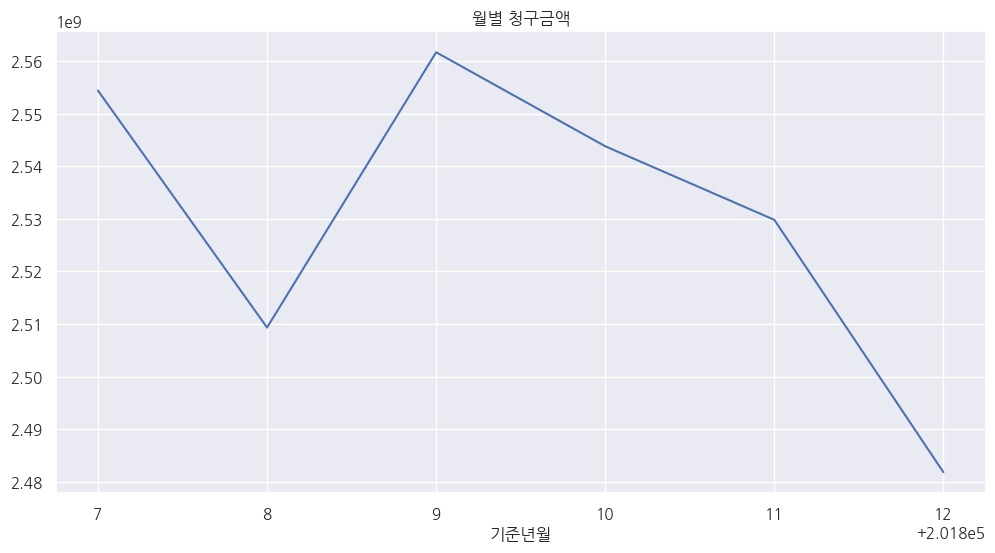

In [ ]:
# 월별 추이 분석
chargeInfo.groupby('기준년월')['청구금액_B0'].sum().plot()
plt.title('월별 청구금액')
plt.show()

<Axes: xlabel='청구금액_B0', ylabel='Count'>

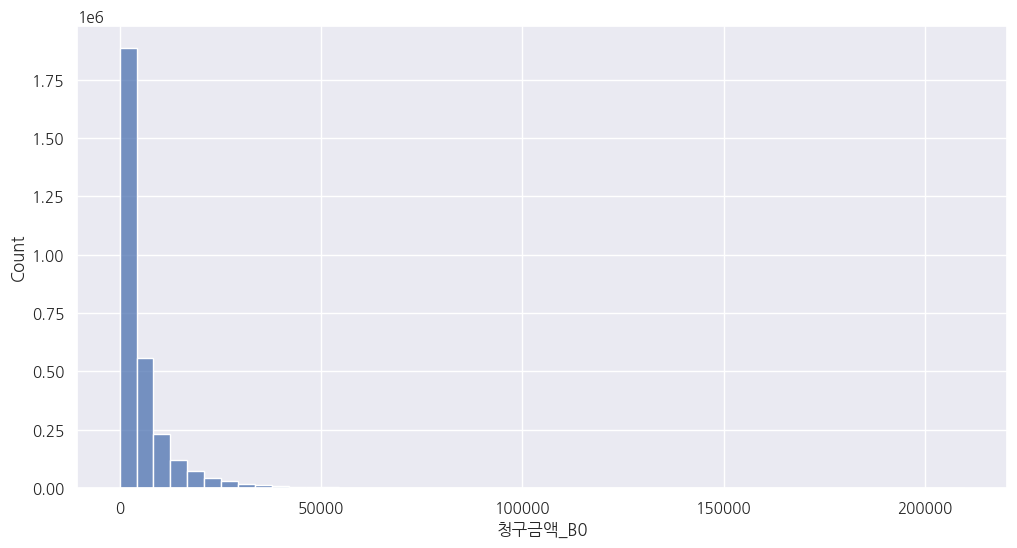

In [ ]:
chargeInfo['청구금액_B0'].describe()
sns.histplot(chargeInfo['청구금액_B0'], bins=50)

In [ ]:
chargeInfo['청구금액_B0'].value_counts()

,count
청구금액_B0,
0,686651
16,2872
17,2783
15,2670
18,2652
...,...
45975,1
76528,1
40505,1


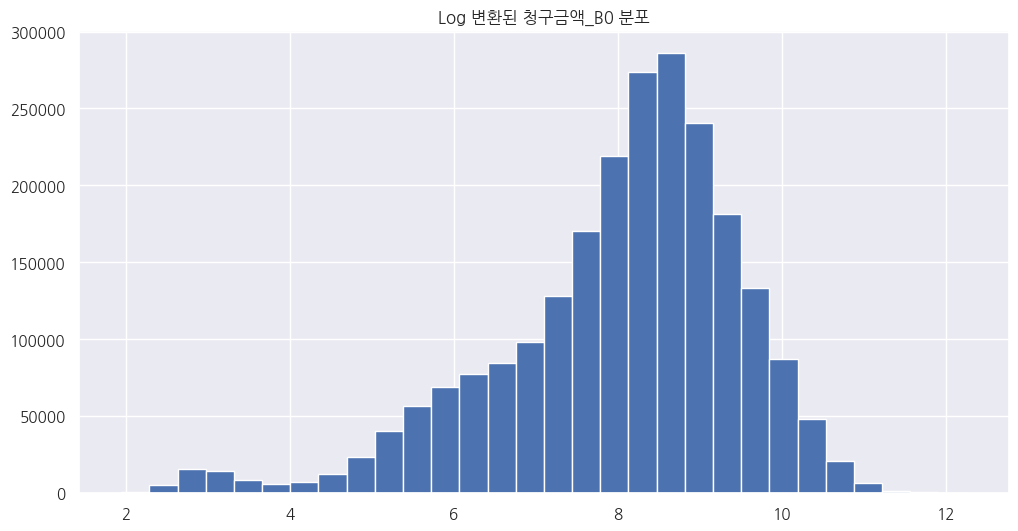

In [ ]:
# 청구금액 수치가 낮은 부분에 몰려있어 전체적으로 보기위해 로그를 취함.(0인 데이터 제외)
chargeAmount = chargeInfo[chargeInfo['청구금액_B0']>0].sort_values('청구금액_B0')

chargeAmount_log = np.log1p(chargeAmount['청구금액_B0'])  # log1p는 log(x+1)로, 0 처리도 안전
plt.hist(chargeAmount_log, bins=30)
plt.title("Log 변환된 청구금액_B0 분포")
plt.show()

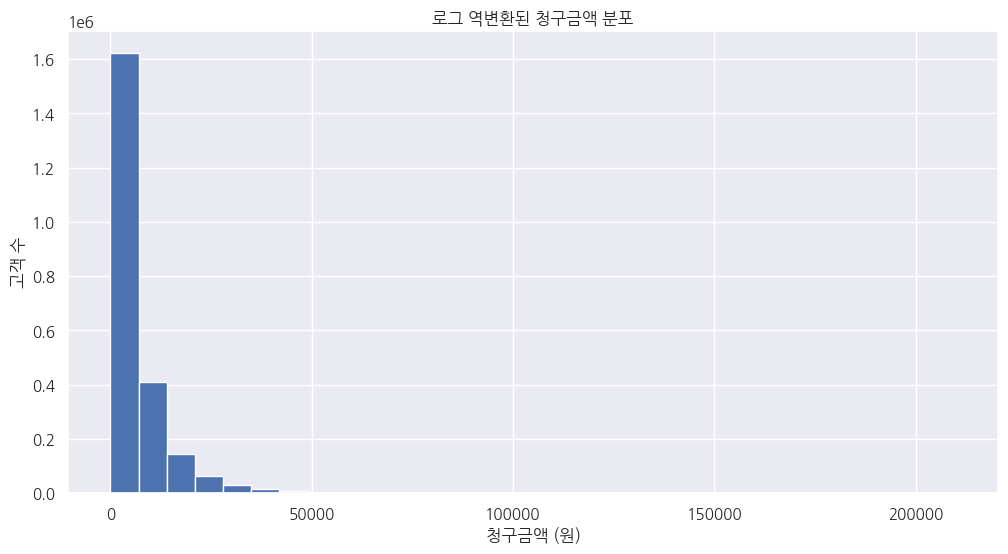

In [ ]:
# 로그 분포 → 다시 원본 스케일로 보기
plt.hist(np.expm1(chargeAmount_log), bins=30)
plt.title("로그 역변환된 청구금액 분포")
plt.xlabel("청구금액 (원)")
plt.ylabel("고객 수")
plt.show()


- 로그값 중 7 ~ 9에 해당하는 금액대의 고객이 약 30만명 존재한다.
- 청구 금액은 3천 ~ 1만원 수준에 가장 많이 몰려있다.
- 고액 청구 금액 고객도 존재하지만 많지 않다.

In [ ]:
chargeAmount['청구금액_B0']

,청구금액_B0
1004356,6
2624829,6
852509,6
890048,6
809185,6
...,...
1035877,191903
1292319,192833
963404,195486
2952215,204497


In [ ]:
# chargeAmount['청구금액_B0_log'] = np.log1p(chargeAmount['청구금액_B0'])

# chargeAmount['청구금액_B0_log'].sort_values()

# chargeAmount['청구금액_B0_복원'] = np.expm1(chargeAmount['청구금액_B0_log'])

# print(f"로그 :{chargeAmount['청구금액_B0_log'].value_counts()}")
# print(f"역변환 : {chargeAmount['청구금액_B0_복원'].value_counts()}")

### 11_청구금액_R3M

In [ ]:
chargeInfo['청구금액_R3M'].value_counts()

,count
청구금액_R3M,
0,598290
54,957
53,940
49,939
47,923
...,...
87853,1
158455,1
93764,1


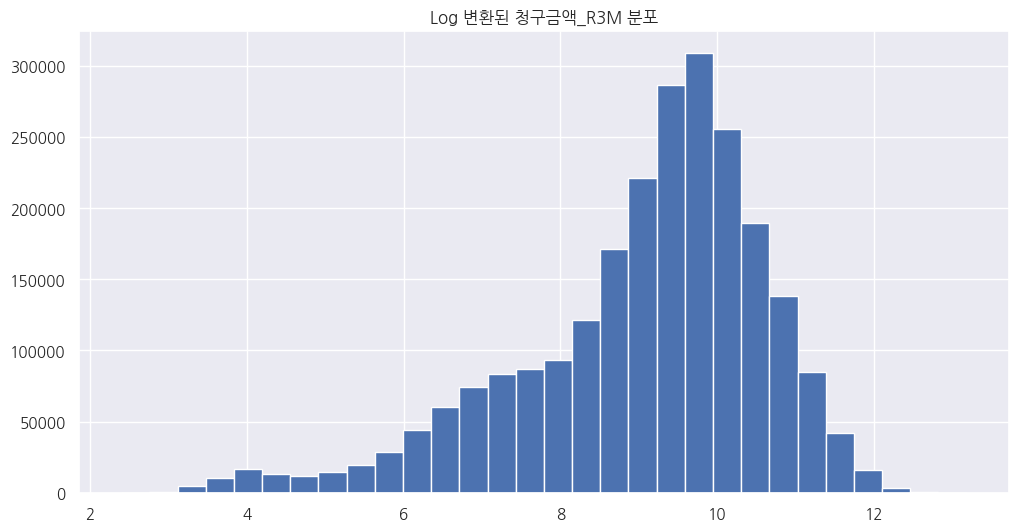

In [ ]:
# 청구금액 수치가 낮은 부분에 몰려있어 전체적으로 보기위해 로그를 취함.(0인 데이터 제외)

chargeAmount_3m = chargeInfo[chargeInfo['청구금액_R3M']>0]

chargeAmount_3m_log = np.log1p(chargeAmount_3m['청구금액_R3M'])  # log1p는 log(x+1)로, 0 처리도 안전
plt.hist(chargeAmount_3m_log, bins=30)
plt.title("Log 변환된 청구금액_R3M 분포")
plt.show()


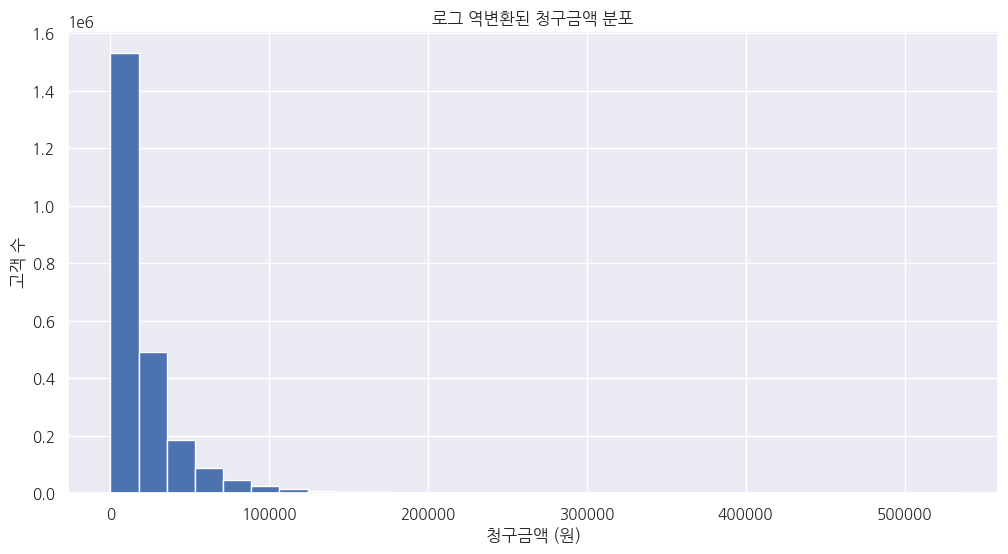

In [ ]:
# 로그 분포 → 다시 원본 스케일로 보기
plt.hist(np.expm1(chargeAmount_3m_log), bins=30)
plt.title("로그 역변환된 청구금액 분포")
plt.xlabel("청구금액 (원)")
plt.ylabel("고객 수")
plt.show()


In [ ]:
# chargeAmount['청구금액_R3M_log'] = np.log1p(chargeAmount['청구금액_R3M'])
# chargeAmount['청구금액_R3M_복원'] = np.expm1(chargeAmount['청구금액_R3M_log'])

# print(f"로그 :{chargeAmount['청구금액_R3M_log'].head(10)}")
# print(f"역변환 : {chargeAmount['청구금액_R3M_복원'].head(10)}")

- 로그값 중 9 ~ 11사이에 해당하는 고객이 30만명이상 존재한다.
- 청구 금액이 3천 ~ 6만 사이인 사람이 가장 많다.

### 12_청구금액_R6M

In [ ]:
chargeInfo['청구금액_R6M'].value_counts()

,count
청구금액_R6M,
0,443023
76,784
81,783
84,775
86,765
...,...
156127,1
289786,1
138697,1


In [ ]:
chargeAmount_6m = chargeInfo[chargeInfo['청구금액_R6M']>0]
chargeAmount_6m['청구금액_R6M'].sort_values()

,청구금액_R6M
1343136,13
489262,16
1491071,16
658146,17
1474665,17
...,...
899780,1057141
471473,1061142
1066062,1112355
416451,1112355


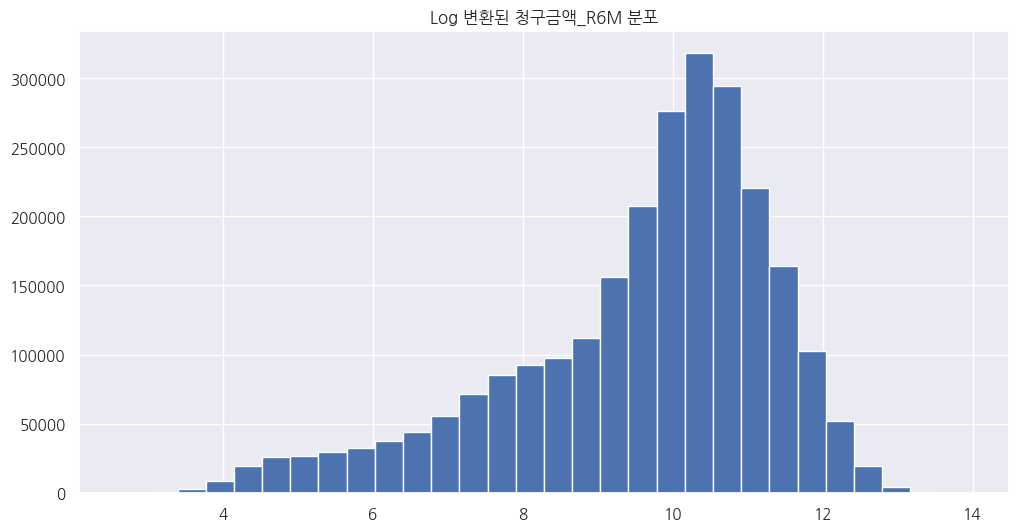

In [ ]:
# 청구금액 수치가 낮은 부분에 몰려있어 전체적으로 보기위해 로그를 취함.(0인 데이터 제외)

chargeAmount_6m = chargeInfo[chargeInfo['청구금액_R6M']>0]

chargeAmount_6m_log = np.log1p(chargeAmount_6m['청구금액_R6M'])  # log1p는 log(x+1)로, 0 처리도 안전
plt.hist(chargeAmount_6m_log, bins=30)
plt.title("Log 변환된 청구금액_R6M 분포")
plt.show()


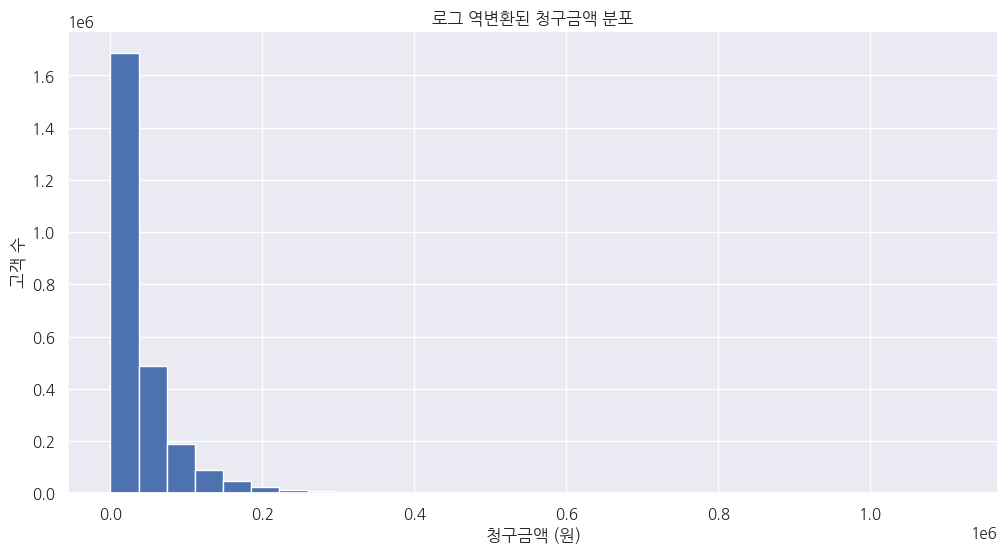

In [ ]:
# 로그 분포 → 다시 원본 스케일로 보기
plt.hist(np.expm1(chargeAmount_6m_log), bins=30)
plt.title("로그 역변환된 청구금액 분포")
plt.xlabel("청구금액 (원)")
plt.ylabel("고객 수")
plt.show()


### 13_포인트_마일리지_건별_B0M

In [ ]:
chargeInfo['포인트_마일리지_건별_B0M'].value_counts()

,count
포인트_마일리지_건별_B0M,
0,2916897
1014,184
1036,181
1033,180
1026,179
...,...
2520,1
2380,1
2658,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_nonzero = chargeInfo[chargeInfo['포인트_마일리지_건별_B0M'] > 0]
print((len(chargeInfo_nonzero) / len(chargeInfo)*100))

2.7701


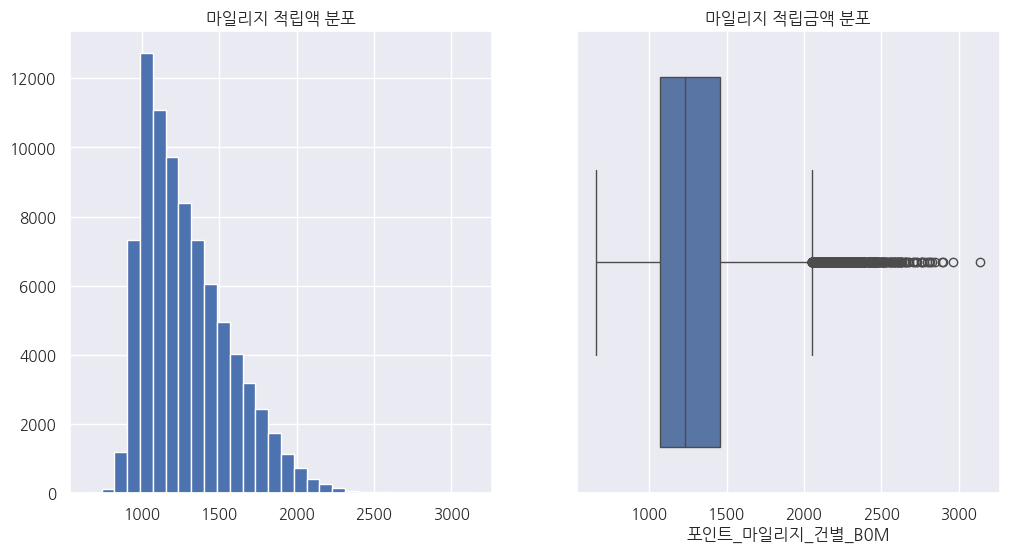

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_nonzero['포인트_마일리지_건별_B0M'], bins=30)
plt.title("마일리지 적립액 분포")

plt.subplot(1, 2, 2)
# 마일리지 적립액 이상치 확인
chargeInfo_nonzero['포인트_마일리지_건별_B0M'].describe()

sns.boxplot(x=chargeInfo_nonzero['포인트_마일리지_건별_B0M'])
plt.title('마일리지 적립금액 분포')

plt.show()

- 건별 마일리지가 0인 데이터가 많다.
- 대부분의 청구 금액은 약 1000원 근처에 몰려있고, 전체적으로 종 모형이다.
- 대다수 사용자는 1000 ~ 1500원 사이 적립
- 2000원이 넘는 적립 고객은 극소수의 고소비자, 특별 이벤트 대상자 가능성 높다.

### 14_포인트_마일리지_건별_R3M

In [ ]:
chargeInfo['포인트_마일리지_건별_R3M'].value_counts()

,count
포인트_마일리지_건별_R3M,
0,2915865
3022,68
3346,67
3215,60
3064,60
...,...
8284,1
6234,1
6587,1


In [ ]:
# 전체 고객중 마일리지 적립된 회원비율
chargeInfo_3m_nonzero = chargeInfo[chargeInfo['포인트_마일리지_건별_R3M'] > 0]
print((len(chargeInfo_nonzero) / len(chargeInfo)*100))

2.7701


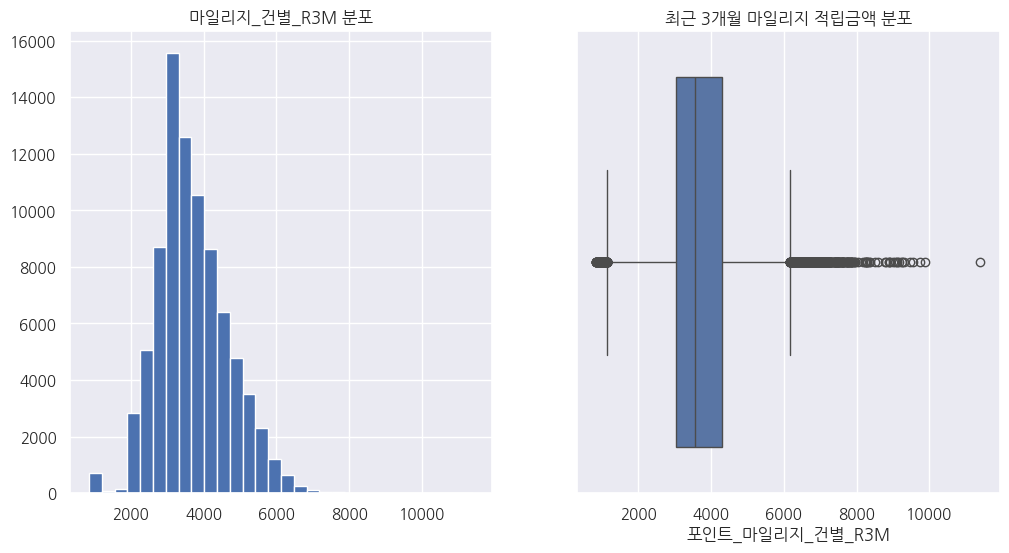

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_3m_nonzero['포인트_마일리지_건별_R3M'], bins=30)
plt.title("마일리지_건별_R3M 분포")

plt.subplot(1, 2, 2)
# 마일리지 적립액 이상치 확인
chargeInfo_3m_nonzero['포인트_마일리지_건별_R3M'].describe()

sns.boxplot(x=chargeInfo_3m_nonzero['포인트_마일리지_건별_R3M'])
plt.title('최근 3개월 마일리지 적립금액 분포')

plt.show()

- 최근3개월치 마일리지 데이터도 0이 압도적으로 많다.
- 대다수의 고객은 최근 3개월 적립액이 약 3000 ~ 4500 사이이다.
- 6000이상 적립한 고객이 많다.(고액 사용자)


### 15_포인트_포인트_건별_B0M

In [ ]:
chargeInfo['포인트_포인트_건별_B0M'].value_counts().sort_values()

,count
포인트_포인트_건별_B0M,
6010,1
5277,1
6033,1
5319,1
6347,1
...,...
2683,134
2883,135
2887,138


In [ ]:
# 전체 고객중 마일리지 적립된 회원비율
chargeInfo_mil_nonzero = chargeInfo[chargeInfo['포인트_포인트_건별_B0M'] > 0]
print((len(chargeInfo_mil_nonzero) / len(chargeInfo)*100))

10.798566666666666


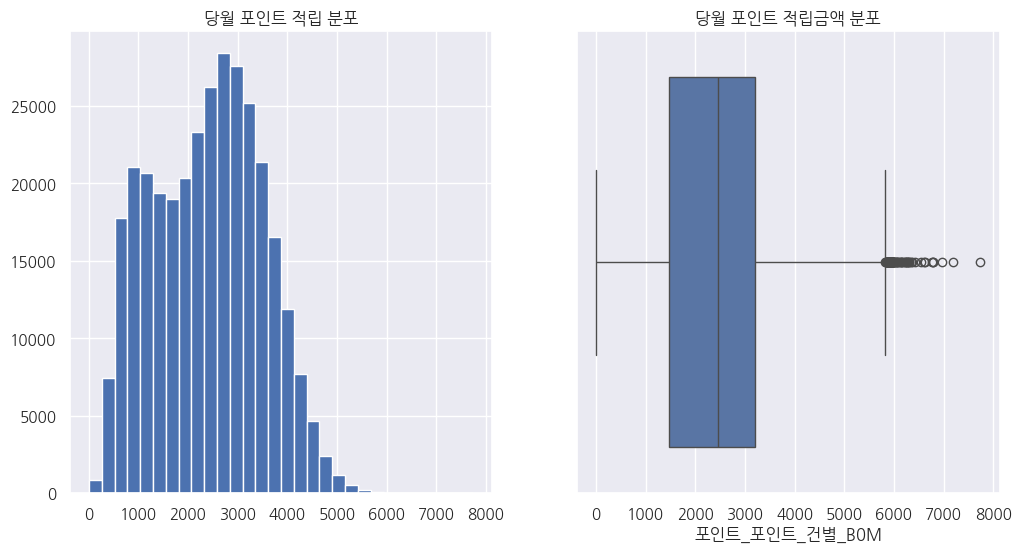

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_mil_nonzero['포인트_포인트_건별_B0M'], bins=30)
plt.title("당월 포인트 적립 분포")

plt.subplot(1, 2, 2)
# 마일리지 적립액 이상치 확인
chargeInfo_mil_nonzero['포인트_마일리지_건별_R3M'].describe()

sns.boxplot(x=chargeInfo_mil_nonzero['포인트_포인트_건별_B0M'])
plt.title('당월 포인트 적립금액 분포')

plt.show()

- 포인트 적립 데이터도 0이 압도적으로 많다.
- 2500 ~ 3000원 사이의 적립금액이 일반적이다.
- 5000원 이상 적립은 극소수, vip고객일 가능성이 있다.

### 16_포인트_포인트_건별_R3M

In [ ]:
chargeInfo['포인트_포인트_건별_R3M'].value_counts()

,count
포인트_포인트_건별_R3M,
0,2657547
8107,58
2077,57
1982,52
3385,52
...,...
15317,1
16427,1
16290,1


In [ ]:
# 전체 고객중 마일리지 적립된 회원비율
chargeInfo_mil_nonzero_R3M = chargeInfo[chargeInfo['포인트_포인트_건별_R3M'] > 0]
print((len(chargeInfo_mil_nonzero_R3M) / len(chargeInfo)*100))

11.413733333333333


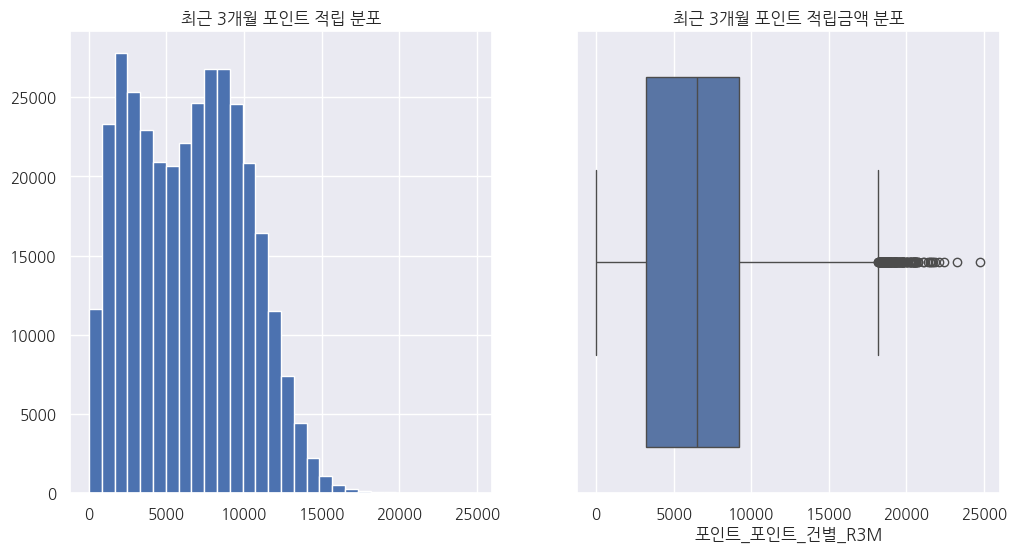

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_mil_nonzero_R3M['포인트_포인트_건별_R3M'], bins=30)
plt.title("최근 3개월 포인트 적립 분포")

plt.subplot(1, 2, 2)
# 마일리지 적립액 이상치 확인
chargeInfo_mil_nonzero_R3M['포인트_포인트_건별_R3M'].describe()

sns.boxplot(x=chargeInfo_mil_nonzero_R3M['포인트_포인트_건별_R3M'])
plt.title('최근 3개월 포인트 적립금액 분포')

plt.show()

- 최근 3개월치 포인트 적립 데이터도 0이 압도적으로 많다.
- 대다수 고객은 3개월동안 약 3000 ~ 11000사이 포인트를 적립한다.
- 18000원 이상 적립은 극소수이다.

### 17_포인트_마일리지_월적립_B0M

In [ ]:
chargeInfo['포인트_마일리지_월적립_B0M'].value_counts()

,count
포인트_마일리지_월적립_B0M,
0,2934221
632,388
629,384
633,380
614,378
...,...
1175,1
369,1
1119,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_milEvent = chargeInfo[chargeInfo['포인트_마일리지_월적립_B0M'] > 0]
print((len(chargeInfo_milEvent) / len(chargeInfo)*100))

2.192633333333333


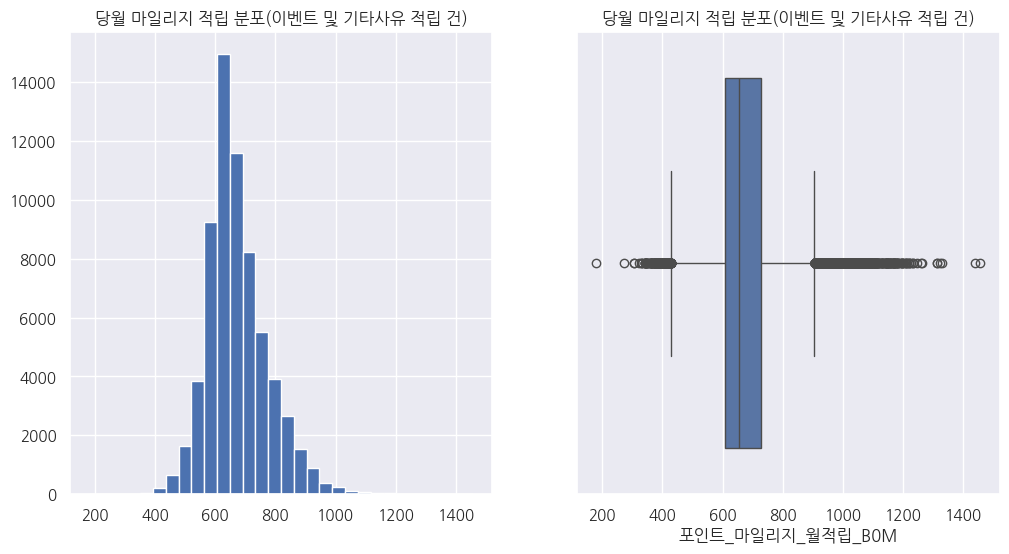

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_milEvent['포인트_마일리지_월적립_B0M'], bins=30)
plt.title("당월 마일리지 적립 분포(이벤트 및 기타사유 적립 건)")

plt.subplot(1, 2, 2)
# 마일리지 적립액 이상치 확인
chargeInfo_milEvent['포인트_마일리지_월적립_B0M'].describe()

sns.boxplot(x=chargeInfo_milEvent['포인트_마일리지_월적립_B0M'])
plt.title('당월 마일리지 적립 분포(이벤트 및 기타사유 적립 건)')

plt.show()

- 이벤트 및 기타사유로 적립(일반적인 적립이 아닌듯 하다)
- 마일리지 적립 데이터도 0이 압도적으로 많다.
- 대다수 고객은 600 ~ 750 사이를 적립한다.
- 1400이상 마일리지 적립한 고객은 극소수이며, VIP고객일 가능성이 있다.

### 18_포인트_마일리지_월적립_R3M

In [ ]:
chargeInfo['포인트_마일리지_월적립_R3M'].value_counts()

,count
포인트_마일리지_월적립_R3M,
0,2931808
1860,160
1842,156
1828,152
1879,151
...,...
3632,1
1323,1
1313,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_milEvent_R3M = chargeInfo[chargeInfo['포인트_마일리지_월적립_R3M'] > 0]
print((len(chargeInfo_milEvent_R3M) / len(chargeInfo)*100))

2.273066666666667


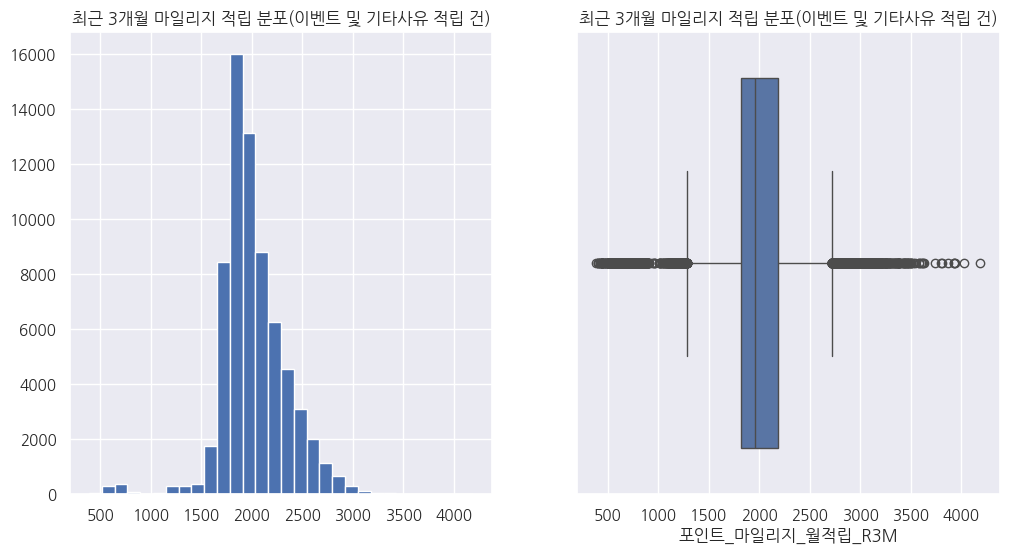

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_milEvent_R3M['포인트_마일리지_월적립_R3M'], bins=30)
plt.title("최근 3개월 마일리지 적립 분포(이벤트 및 기타사유 적립 건)")

plt.subplot(1, 2, 2)
# 마일리지 적립액 이상치 확인
chargeInfo_milEvent_R3M['포인트_마일리지_월적립_R3M'].describe()

sns.boxplot(x=chargeInfo_milEvent_R3M['포인트_마일리지_월적립_R3M'])
plt.title('최근 3개월 마일리지 적립 분포(이벤트 및 기타사유 적립 건)')

plt.show()

- 이벤트 및 기타사유로 적립(일반적인 적립이 아닌듯 하다)
- 마일리지 적립 데이터도 0이 압도적으로 많다.
- 1800 ~ 2200원 사이 적립이 일반적이다.
- 4000이상 마일리지 적립고객은 극소수, VIP고객일 가능성이 높다.

### 19_포인트_포인트_월적립_B0M

In [ ]:
chargeInfo['포인트_포인트_월적립_B0M'].value_counts()

,count
포인트_포인트_월적립_B0M,
0,2943047
5002,1614
5003,1380
5001,1290
5004,938
...,...
19560,1
3971,1
17738,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_pointEvent = chargeInfo[chargeInfo['포인트_포인트_월적립_B0M'] > 0]
print((len(chargeInfo_pointEvent) / len(chargeInfo)*100))

1.8984333333333332


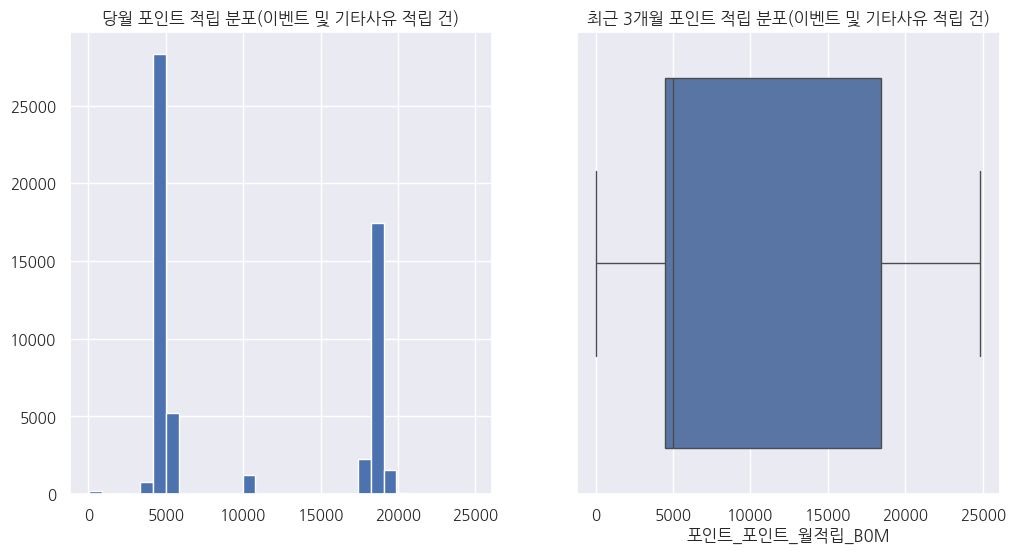

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_pointEvent['포인트_포인트_월적립_B0M'], bins=30)
plt.title("당월 포인트 적립 분포(이벤트 및 기타사유 적립 건)")

plt.subplot(1, 2, 2)
# 포인트 적립액 이상치 확인
chargeInfo_pointEvent['포인트_포인트_월적립_B0M'].describe()

sns.boxplot(x=chargeInfo_pointEvent['포인트_포인트_월적립_B0M'])
plt.title('최근 3개월 포인트 적립 분포(이벤트 및 기타사유 적립 건)')

plt.show()

- 이벤트 및 기타사유로 적립(일반적인 적립이 아닌듯 하다)
- 마일리지 적립 데이터도 0이 압도적으로 많다.
- 적립포인트 구간이 두 군데 집중되어있다.
- 정기적인 이벤트 혹은 특수한 지급 포인트일 가능성이 크다.
- 또한 값이 두 군데 몰려있어 이상치 판단이 무의미하다.

### 20_포인트_포인트_월적립_R3M

In [ ]:
chargeInfo['포인트_포인트_월적립_R3M'].value_counts()

,count
포인트_포인트_월적립_R3M,
0,2861368
5002,679
5001,578
5003,504
5000,355
...,...
27950,1
23028,1
23128,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_pointEvent_R3M = chargeInfo[chargeInfo['포인트_포인트_월적립_R3M'] > 0]
print((len(chargeInfo_pointEvent_R3M) / len(chargeInfo)*100))

4.621066666666667


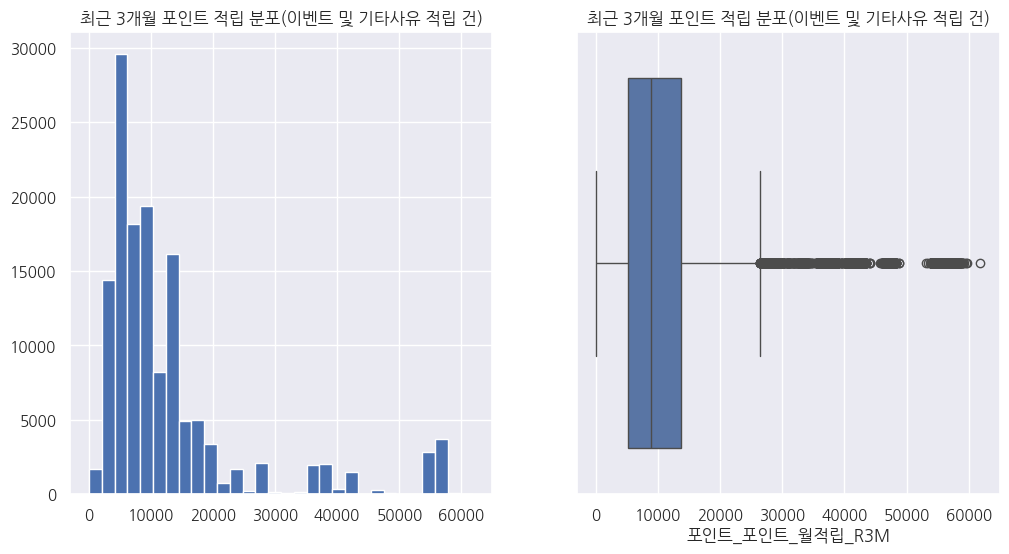

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_pointEvent_R3M['포인트_포인트_월적립_R3M'], bins=30)
plt.title("최근 3개월 포인트 적립 분포(이벤트 및 기타사유 적립 건)")

plt.subplot(1, 2, 2)
# 포인트 적립액 이상치 확인
chargeInfo_pointEvent_R3M['포인트_포인트_월적립_R3M'].describe()

sns.boxplot(x=chargeInfo_pointEvent_R3M['포인트_포인트_월적립_R3M'])
plt.title('최근 3개월 포인트 적립 분포(이벤트 및 기타사유 적립 건)')

plt.show()

- 이벤트 및 기타사유로 적립(일반적인 적립이 아닌듯 하다)
- 마일리지 적립 데이터도 0이 압도적으로 많다.
- 대다수 고객은 5000 ~ 15000구간에 집중되어있다.
- 30000이상 고객 다수 존재한다.
- 이벤트성 포인트 반복 적립 고객 존재 가능성이 있다.

### 21_포인트_적립포인트_R12M

In [ ]:
chargeInfo['포인트_적립포인트_R12M'].value_counts()

,count
포인트_적립포인트_R12M,
0,2335412
2044,190
1793,178
1979,178
2084,175
...,...
61211,1
88382,1
44821,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_pointEvent_R12M = chargeInfo[chargeInfo['포인트_적립포인트_R12M'] > 0]
print((len(chargeInfo_nonzero) / len(chargeInfo)*100))

2.7701


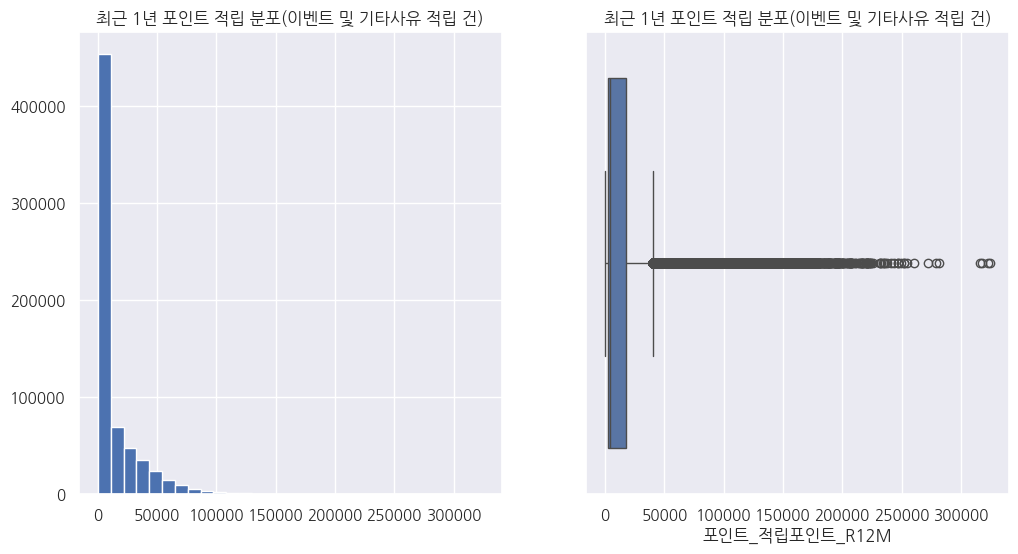

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_pointEvent_R12M['포인트_적립포인트_R12M'], bins=30)
plt.title("최근 1년 포인트 적립 분포(이벤트 및 기타사유 적립 건)")

plt.subplot(1, 2, 2)
# 포인트 적립액 이상치 확인
chargeInfo_pointEvent_R12M['포인트_적립포인트_R12M'].describe()

sns.boxplot(x=chargeInfo_pointEvent_R12M['포인트_적립포인트_R12M'])
plt.title('최근 1년 포인트 적립 분포(이벤트 및 기타사유 적립 건)')

plt.show()

- 포인트 적립 데이터도 0이 압도적으로 많다.
- 대부분 고객은 0 ~ 20000사이에 포인트를 적립받았고, 5000원 이하에 40만명 이상 집중되어 있다.
- 포인트 금액 커질수록 고객 수가 급감하고 있다.
- 이상치가 매우 많기때문에 특정 시점에서 이상치인지 확인해야될것 같다

### 22_포인트_적립포인트_R3M

In [ ]:
chargeInfo['포인트_적립포인트_R3M'].value_counts()

,count
포인트_적립포인트_R3M,
0,2470190
856,82
675,79
586,76
767,75
...,...
25727,1
32986,1
33783,1


In [ ]:
# 전체 고객중 포인트 적립된 회원비율
chargeInfo_pointEvent_nomil_R3M = chargeInfo[chargeInfo['포인트_적립포인트_R3M'] > 0]
print((len(chargeInfo_pointEvent_nomil_R3M) / len(chargeInfo)*100))

17.65686666666667


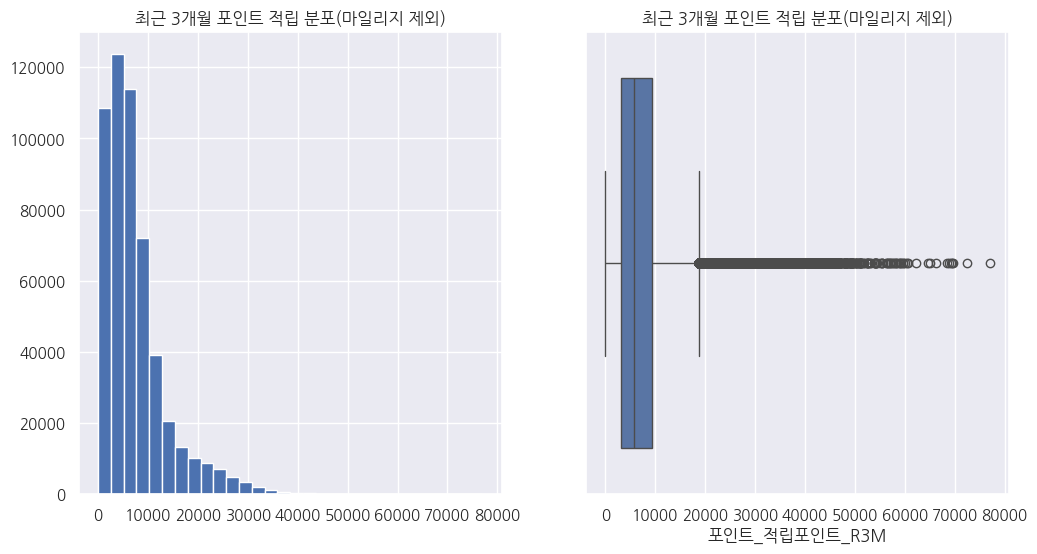

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(chargeInfo_pointEvent_nomil_R3M['포인트_적립포인트_R3M'], bins=30)
plt.title("최근 3개월 포인트 적립 분포(마일리지 제외)")

plt.subplot(1, 2, 2)
# 포인트 적립액 이상치 확인
chargeInfo_pointEvent_nomil_R3M['포인트_적립포인트_R3M'].describe()

sns.boxplot(x=chargeInfo_pointEvent_nomil_R3M['포인트_적립포인트_R3M'])
plt.title('최근 3개월 포인트 적립 분포(마일리지 제외)')

plt.show()

- 포인트 적립 데이터도 0이 압도적으로 많다.
- 0 ~ 10000원 사이의 적립액이 일반적이다.
- 포인트 금액이 커질 수록 적립고객 수가 급감한다.
- 이상치가 많기때문에 특정 시점때문인지 확인이 필요할 것 같다.

### 23_포인트_이용포인트_R12M

In [ ]:
chargeInfo['포인트_이용포인트_R12M'].value_counts()

,count
포인트_이용포인트_R12M,
0,2016993
2213,200
1681,190
2241,188
2141,187
...,...
119507,1
72277,1
445326,1


In [ ]:
# 전체 고객중 포인트 사용한 회원비율
chargeInfo_usePoint = chargeInfo[chargeInfo['포인트_이용포인트_R12M'] > 0]
print((len(chargeInfo_usePoint) / len(chargeInfo)*100))

32.7669


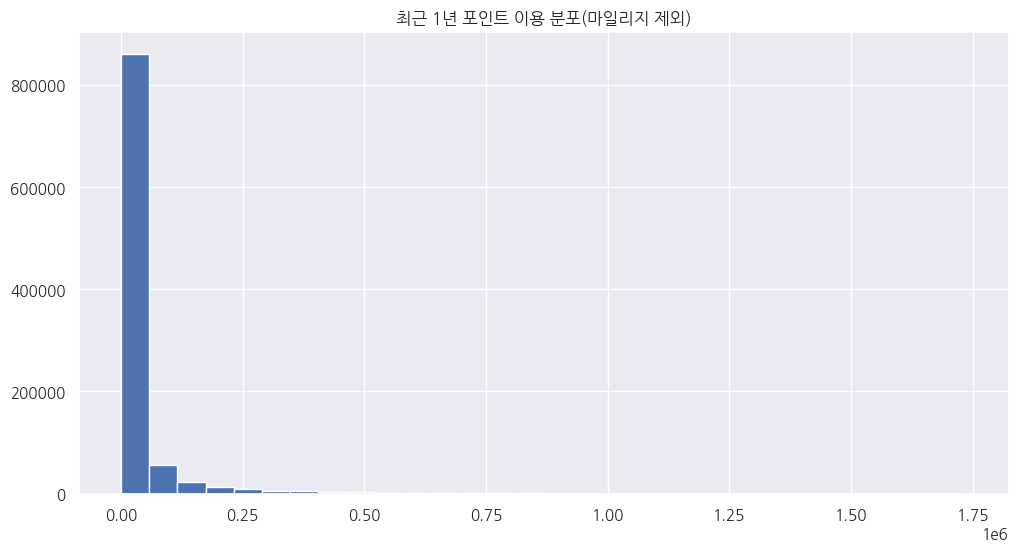

In [ ]:
plt.hist(chargeInfo_usePoint['포인트_이용포인트_R12M'], bins=30)
plt.title("최근 1년 포인트 이용 분포(마일리지 제외)")
plt.show()

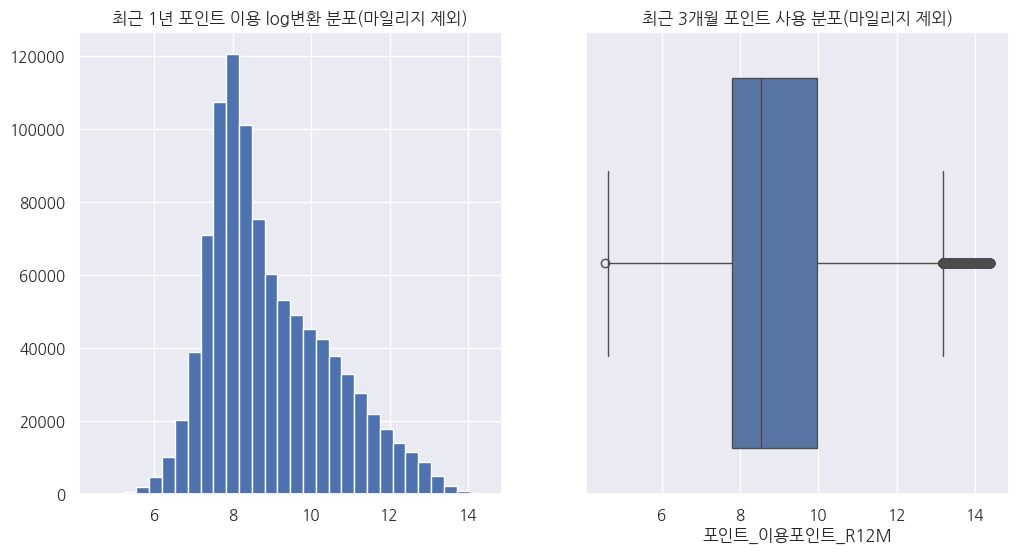

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(np.log1p(chargeInfo_usePoint['포인트_이용포인트_R12M']), bins=30)
plt.title("최근 1년 포인트 이용 log변환 분포(마일리지 제외)")

plt.subplot(1, 2, 2)
# 포인트 사용액 이상치 확인
chargeInfo_usePoint['포인트_이용포인트_R12M'].describe()

sns.boxplot(x=np.log1p(chargeInfo_usePoint['포인트_이용포인트_R12M']))
plt.title('최근 3개월 포인트 사용 분포(마일리지 제외)')

plt.show()

In [ ]:
print(np.expm1(7.5))
print(np.expm1(8.5))

1807.0424144560632
4913.768840299134


- 대부분 고객의 포인트 사용 금액은 2000 ~ 5000원 수준이다.
- 극소수 사용자 중 100만원 이상도 존재한다.

### 포인트_이용포인트_R3M

In [ ]:
chargeInfo['포인트_이용포인트_R3M'].value_counts()

,count
포인트_이용포인트_R3M,
0,2348286
489,121
2318,121
408,120
1602,118
...,...
44340,1
53459,1
96716,1


In [ ]:
# 전체 고객중 포인트 사용한 회원비율
chargeInfo_usePoint_R3M = chargeInfo[chargeInfo['포인트_이용포인트_R3M'] > 0]
print((len(chargeInfo_usePoint_R3M) / len(chargeInfo)*100))

21.723766666666666


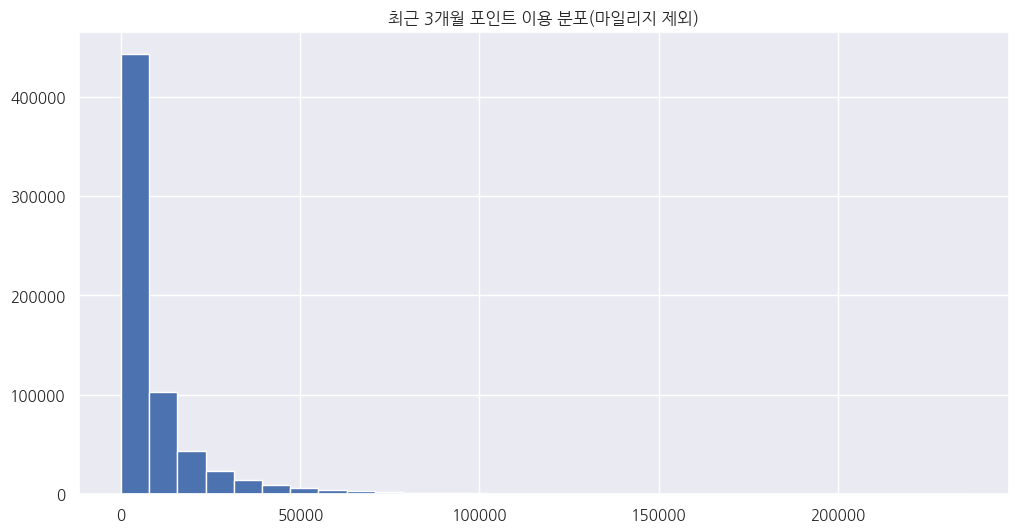

In [ ]:
plt.hist(chargeInfo_usePoint_R3M['포인트_이용포인트_R3M'], bins=30)
plt.title("최근 3개월 포인트 이용 분포(마일리지 제외)")
plt.show()

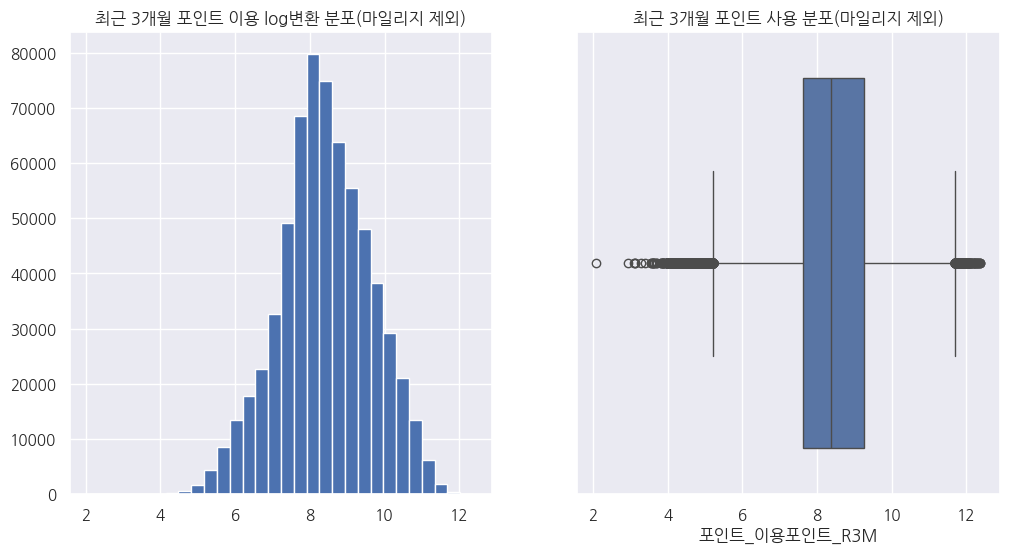

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(np.log1p(chargeInfo_usePoint_R3M['포인트_이용포인트_R3M']), bins=30)
plt.title("최근 3개월 포인트 이용 log변환 분포(마일리지 제외)")

plt.subplot(1, 2, 2)
# 포인트 사용액 이상치 확인
chargeInfo_usePoint_R3M['포인트_이용포인트_R3M'].describe()

sns.boxplot(x=np.log1p(chargeInfo_usePoint_R3M['포인트_이용포인트_R3M']))
plt.title('최근 3개월 포인트 사용 분포(마일리지 제외)')

plt.show()

In [ ]:
print(np.expm1(7))
print(np.expm1(9.5))
print(np.expm1(8.2))

1095.6331584284585
13358.726829661871
3639.950307332352


- 대부분의 고객은 1000 ~ 13000사이의 포인트를 사용한다.
- 그 중 3000 ~ 4000 사이의 포인트 사용이 가장 흔하다.
- 극소수의 저/고사용 고객이 존재한다.


<Axes: xlabel='기준년월'>

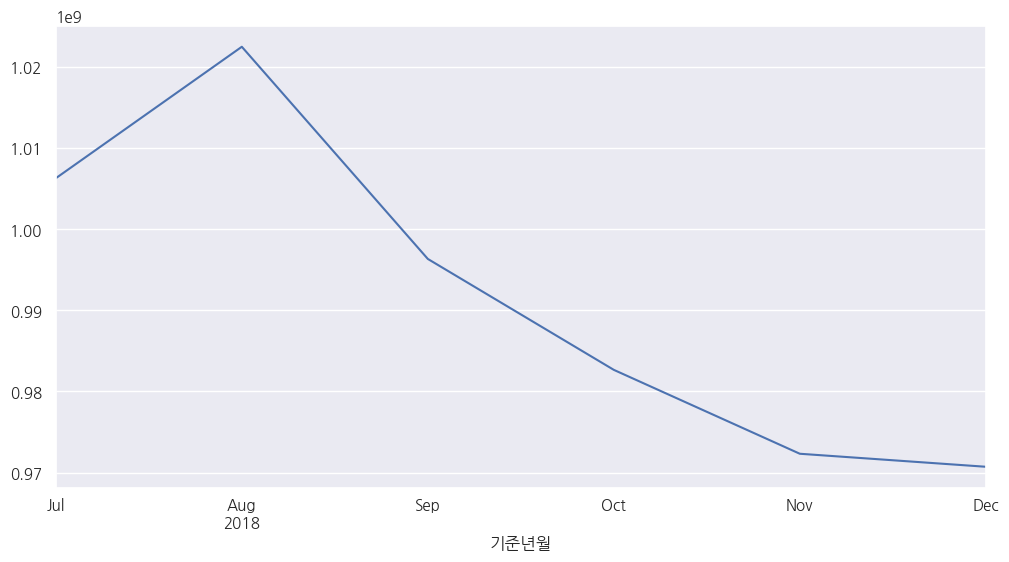

In [ ]:
chargeInfo["기준년월"] = pd.to_datetime(chargeInfo["기준년월"], format="%Y%m")
chargeInfo.groupby("기준년월")["포인트_이용포인트_R3M"].sum().plot()

- 7월 대비 8월에 포인트 사용량이 가장 높다.
- 이 시기에 여름 프로모션 또는 이벤트가 있었을 가능성이 높다.
- 9월부터 포인트 사용 총액이 줄어들고 있다.

In [ ]:
# chargeInfo.query('포인트_마일리지_건별_B0M >  0 and ID == "TRAIN_000037"')
chargeInfo.groupby("기준년월")["포인트_이용포인트_R3M"].sum()

,포인트_이용포인트_R3M
기준년월,
2018-07-01,1006279257
2018-08-01,1022483354
2018-09-01,996332920
2018-10-01,982660055
2018-11-01,972319755
2018-12-01,970715830


# 비슷한 컬럼끼리 묶어서 확인 & Segment컬럼 가져와서 비교하기
- 최종적으로는 Segment를 예측하는 것이기 때문

### Segment별 청구금액 규모 비교(당월, 3개월, 6개월)

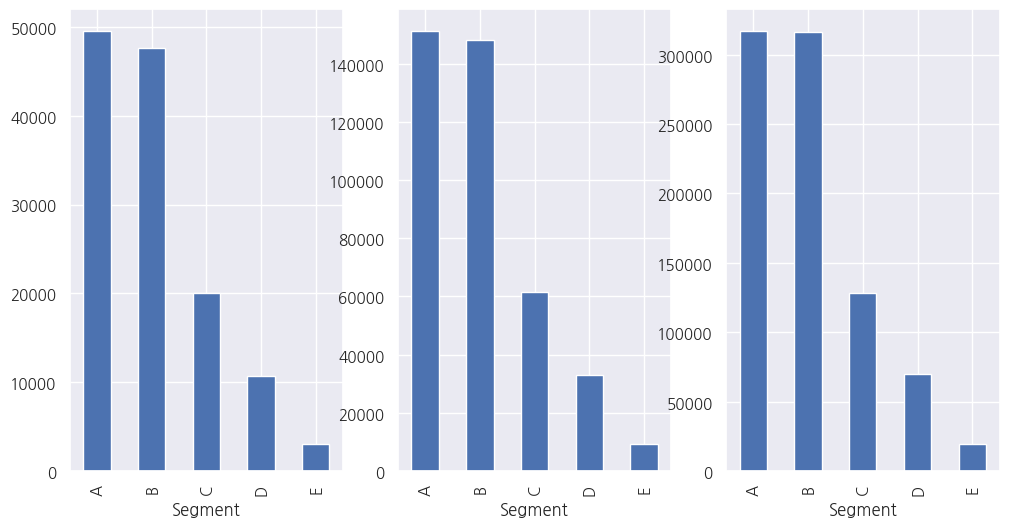

In [ ]:
plt.subplot(1, 3, 1)
chargeInfo.groupby('Segment')['청구금액_B0'].mean().plot(kind='bar')

plt.subplot(1, 3, 2)
chargeInfo.groupby('Segment')['청구금액_R3M'].mean().plot(kind='bar')

plt.subplot(1, 3, 3)
chargeInfo.groupby('Segment')['청구금액_R6M'].mean().plot(kind='bar')

plt.show()

- 당월에서는 A가 가장 금액이 높지만 B와 큰 차이를 보이진 않는다.
- 3개월, 6개월이 될수록 A, B 등급은 차이가 없어진다.

### Segment별 마일리지 적립 비교(당월, 3개월)

In [ ]:
chargeInfo[['기준년월', 'ID', '마일_적립포인트_R3M', '포인트_마일리지_건별_R3M']].query('마일_적립포인트_R3M > 0')

,기준년월,ID,마일_적립포인트_R3M,포인트_마일리지_건별_R3M
16,2018-07-01,TRAIN_000016,1867,0
37,2018-07-01,TRAIN_000037,6277,3887
50,2018-07-01,TRAIN_000050,1699,0
55,2018-07-01,TRAIN_000055,4216,4216
91,2018-07-01,TRAIN_000091,1823,0
...,...,...,...,...
2999960,2018-12-01,TEST_99960,2318,2999
2999974,2018-12-01,TEST_99974,7181,5705
2999982,2018-12-01,TEST_99982,2501,0
2999988,2018-12-01,TEST_99988,7784,5964


In [ ]:
custormer = ['TRAIN_000037', 'TRAIN_000055']

chargeInfo[['기준년월', 'ID', '마일_적립포인트_R3M', '포인트_마일리지_건별_R3M']].query('마일_적립포인트_R3M > 0 and ID in @custormer').sort_values('ID')

,기준년월,ID,마일_적립포인트_R3M,포인트_마일리지_건별_R3M
37,2018-07-01,TRAIN_000037,6277,3887
400037,2018-08-01,TRAIN_000037,6234,4051
800037,2018-09-01,TRAIN_000037,3817,4220
1200037,2018-10-01,TRAIN_000037,4496,4482
1600037,2018-11-01,TRAIN_000037,5307,4788
2000037,2018-12-01,TRAIN_000037,4259,4806
55,2018-07-01,TRAIN_000055,4216,4216
400055,2018-08-01,TRAIN_000055,4108,4108
800055,2018-09-01,TRAIN_000055,4055,4425
1200055,2018-10-01,TRAIN_000055,4460,4481


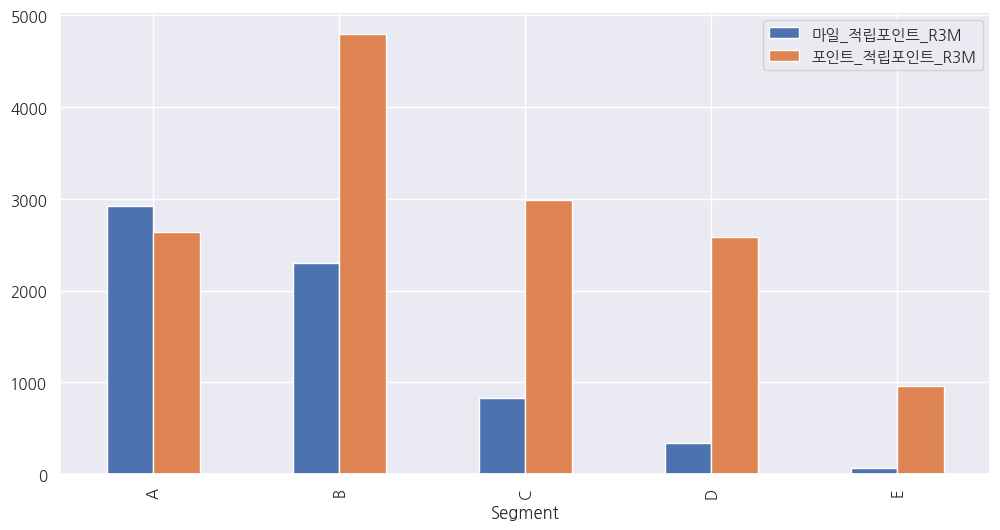

In [ ]:
chargeInfo.groupby('Segment')[['마일_적립포인트_R3M', '포인트_적립포인트_R3M']].mean().plot(kind='bar')
plt.show()

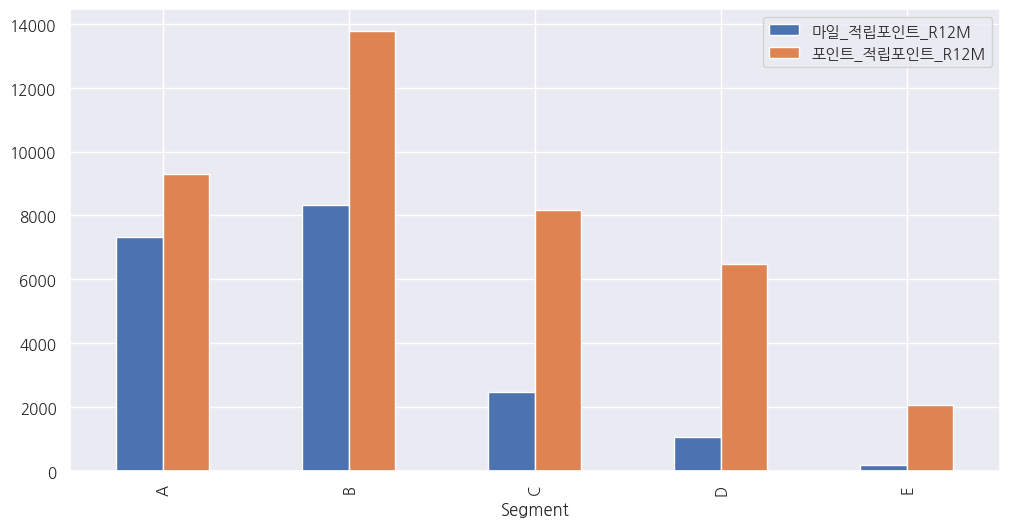

In [ ]:
chargeInfo.groupby('Segment')[['마일_적립포인트_R12M', '포인트_적립포인트_R12M']].mean().plot(kind='bar')
plt.show()

- A : 마일리지 적립이 약간 더 많지만 큰 차이는 아니다.
- B : 포인트 적립이 가장 많지만 마일리지 적립도 적은 편은 아니다.
- C, D : 포인트는 중간, 마일리지는 거의 없다.
- E : 둘다 거의 없다.

### Segment별 포인트/마일리지 적립대비 사용액 비교
- 이용포인트 데이터가 3개월 또는 1년 밖에 없기때문에 3개월, 1년만 비교함.

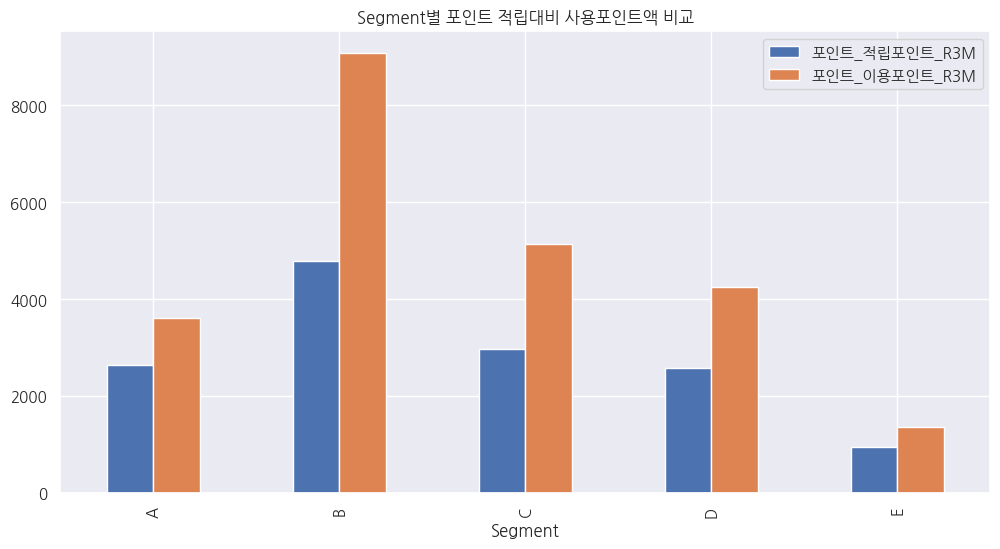

In [ ]:
chargeInfo.groupby('Segment')[['포인트_적립포인트_R3M', '포인트_이용포인트_R3M']].mean().plot(kind='bar')
plt.title('Segment별 포인트 적립대비 사용포인트액 비교')
plt.show()

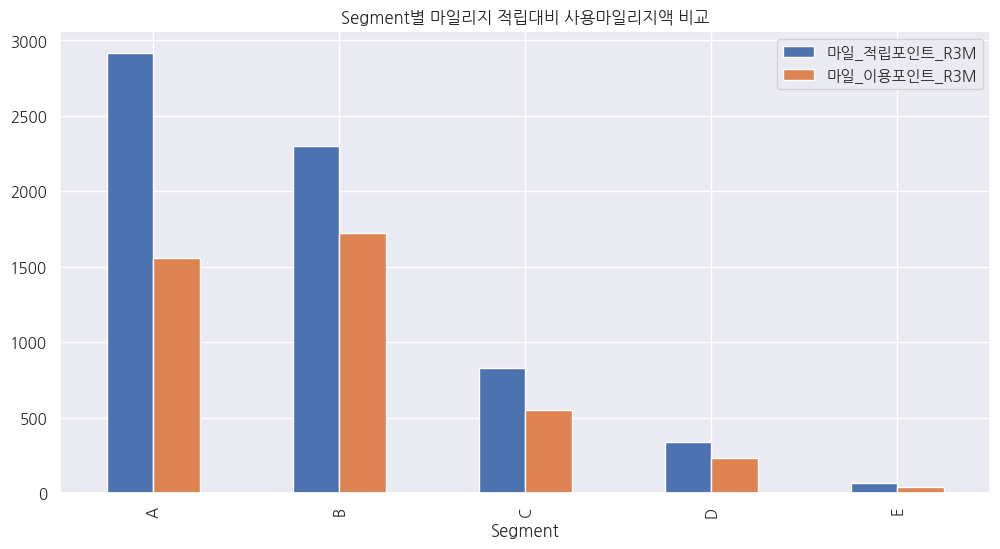

In [ ]:
chargeInfo.groupby('Segment')[['마일_적립포인트_R3M', '마일_이용포인트_R3M']].mean().plot(kind='bar')
plt.title('Segment별 마일리지 적립대비 사용마일리지액 비교')
plt.show()

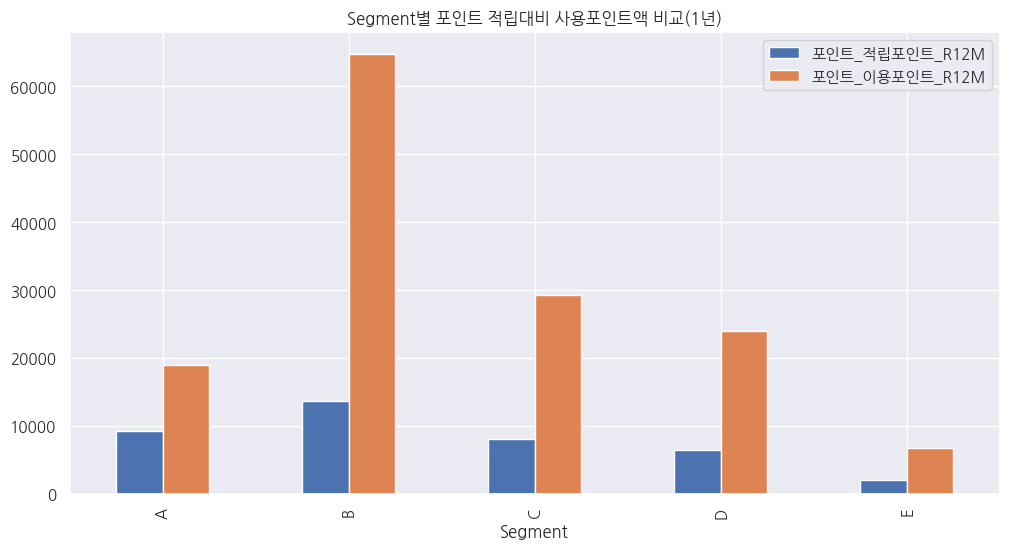

In [ ]:
chargeInfo.groupby('Segment')[['포인트_적립포인트_R12M', '포인트_이용포인트_R12M']].mean().plot(kind='bar')
plt.title('Segment별 포인트 적립대비 사용포인트액 비교(1년)')
plt.show()

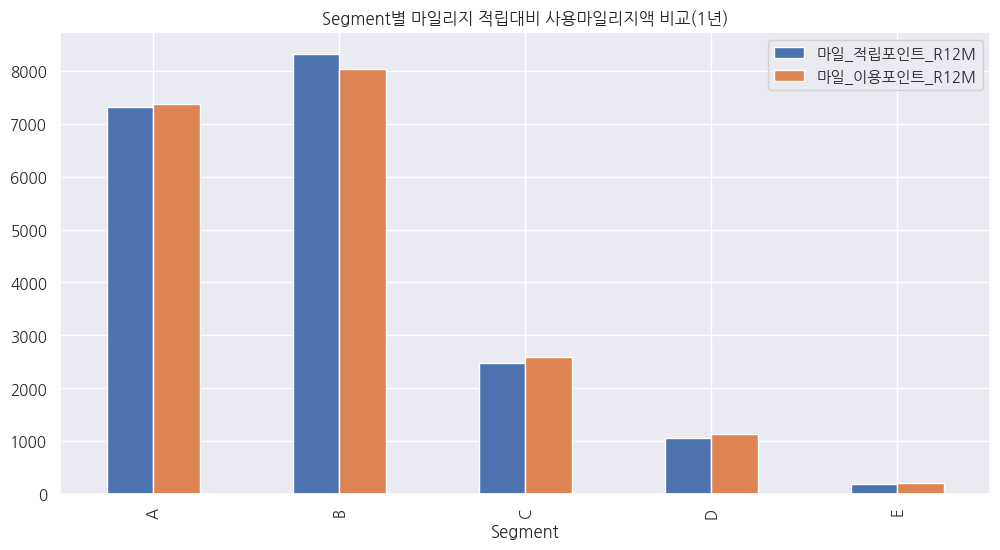

In [ ]:
chargeInfo.groupby('Segment')[['마일_적립포인트_R12M', '마일_이용포인트_R12M']].mean().plot(kind='bar')
plt.title('Segment별 마일리지 적립대비 사용마일리지액 비교(1년)')
plt.show()

- A : 둘다 적립대비 비슷하게 사용하지만 마일리지 사용이 좀 더 많다.
- B : 적립액은 많지만 포인트는 적립대비 사용액이 더 많은 것 같다.
- C, D : 적립액보다 사용액이 많으며, 마일리지 적립/사용 규모는 작다.
- E : 이벤트성 적립일 것으로 판단된다.(이탈 고객 가능성이 높음)

### 정상 적립액 대비 이벤트 또는 기타 적립 비교

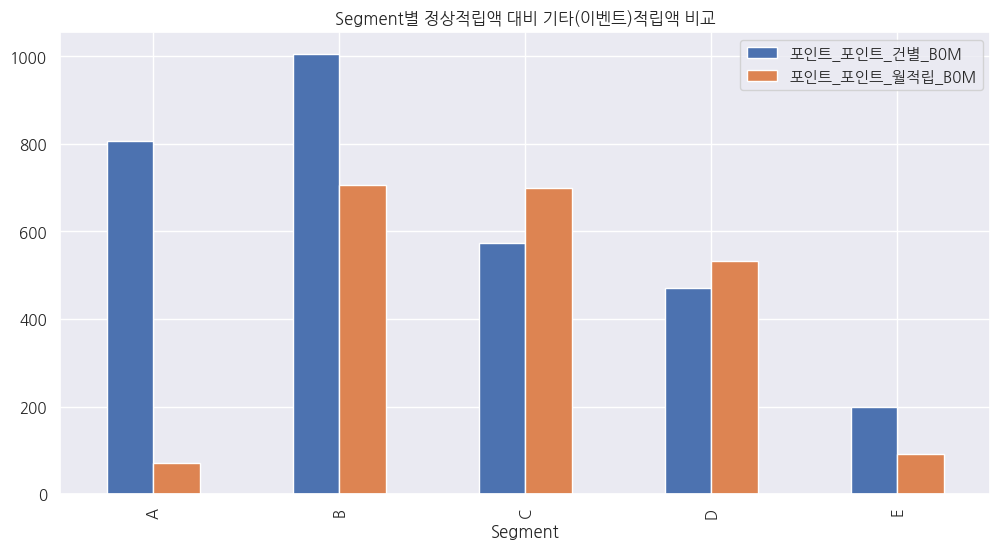

In [ ]:
# 포인트
chargeInfo.groupby('Segment')[['포인트_포인트_건별_B0M', '포인트_포인트_월적립_B0M']].mean().plot(kind='bar')
plt.title('Segment별 정상적립액 대비 기타(이벤트)적립액 비교')
plt.show()

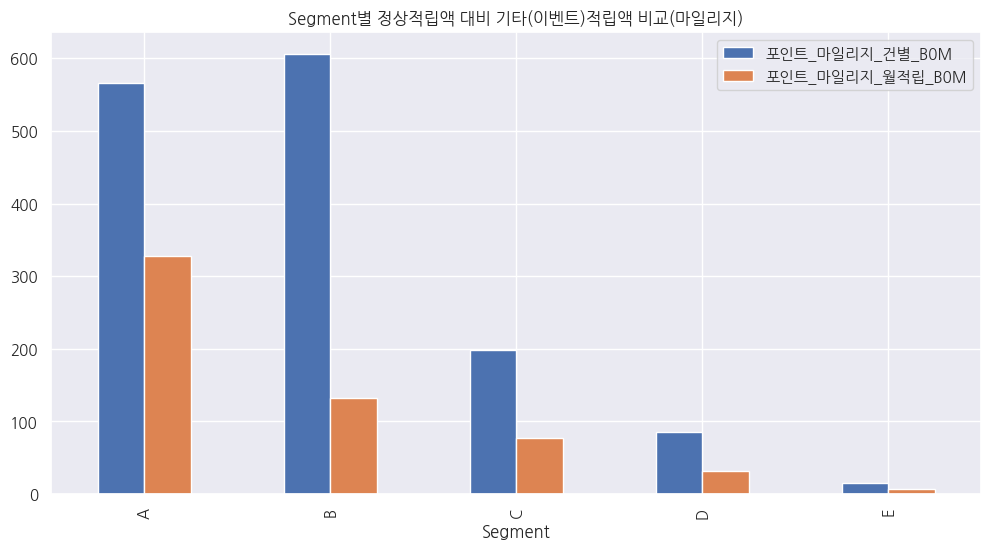

In [ ]:
# 마일리지
chargeInfo.groupby('Segment')[['포인트_마일리지_건별_B0M', '포인트_마일리지_월적립_B0M']].mean().plot(kind='bar')
plt.title('Segment별 정상적립액 대비 기타(이벤트)적립액 비교(마일리지)')
plt.show()

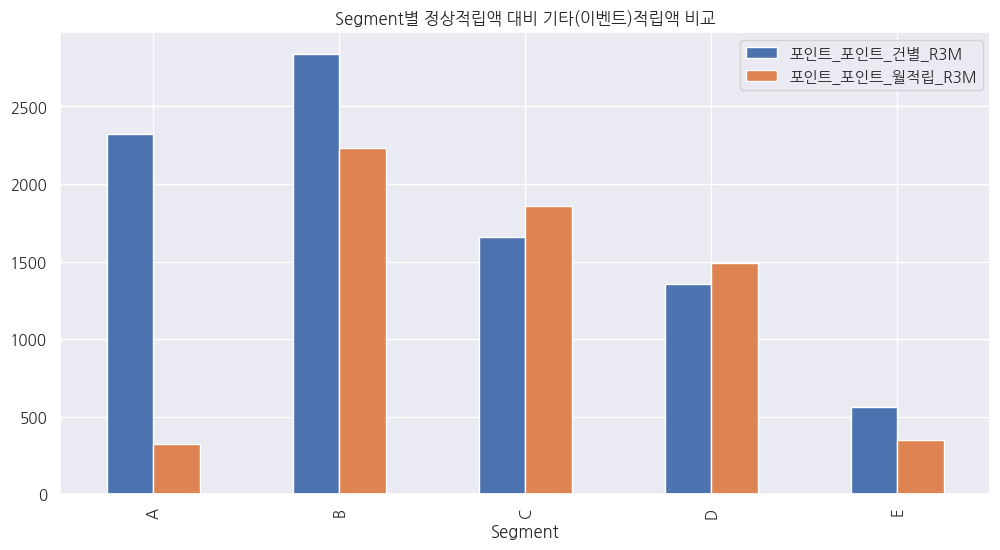

In [ ]:
# 최근 3개월 포인트 적립
chargeInfo.groupby('Segment')[['포인트_포인트_건별_R3M', '포인트_포인트_월적립_R3M']].mean().plot(kind='bar')
plt.title('Segment별 정상적립액 대비 기타(이벤트)적립액 비교')
plt.show()

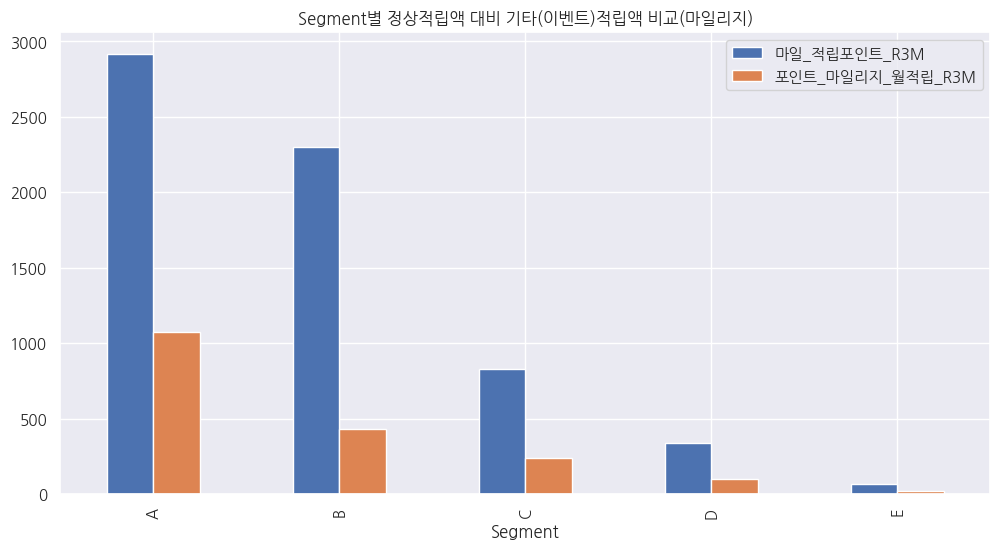

In [ ]:
# 최근 3개월 마일리지 적립
chargeInfo.groupby('Segment')[['마일_적립포인트_R3M', '포인트_마일리지_월적립_R3M']].mean().plot(kind='bar')
plt.title('Segment별 정상적립액 대비 기타(이벤트)적립액 비교(마일리지)')
plt.show()

- A : 일반 적립이 많고, 이벤트 적립 비중도 있지만 마일리지일때 많음.(프리미엄 고객층 예상)
- B : 일반 적립이 많고, 이벤트 적립 비중도 있지만 포인트 일때 많음.(포인트 중심)
- C : 포인트 ,마일리지 둘다 비슷하게 균형을 이루지만 이벤트성 포인트 적립이 크다.(마케팅 반응성이 높은 그룹으로 예상)
- D : 이벤트성 포인트 적립 비중이 큼.(저소비 고객층)
- E : 두 적립 모두 매우 낮음(휴면 고객일 가능성있음)

### Segment별 할인 건수 비교

In [ ]:
chargeInfo.groupby('Segment')['할인건수_R3M'].value_counts()

Segment  할인건수_R3M
A        1회 이상           861
         10회 이상           99
         20회 이상           12
B        1회 이상           114
         10회 이상           25
         20회 이상            5
C        1회 이상         92466
         10회 이상        24225
         20회 이상         8856
         30회 이상         2042
         40회 이상            1
D        1회 이상        256397
         10회 이상        66435
         20회 이상        22196
         30회 이상         4211
         40회 이상            3
E        1회 이상       1792433
         10회 이상       105867
         20회 이상        21940
         30회 이상         1812
Name: count, dtype: int64

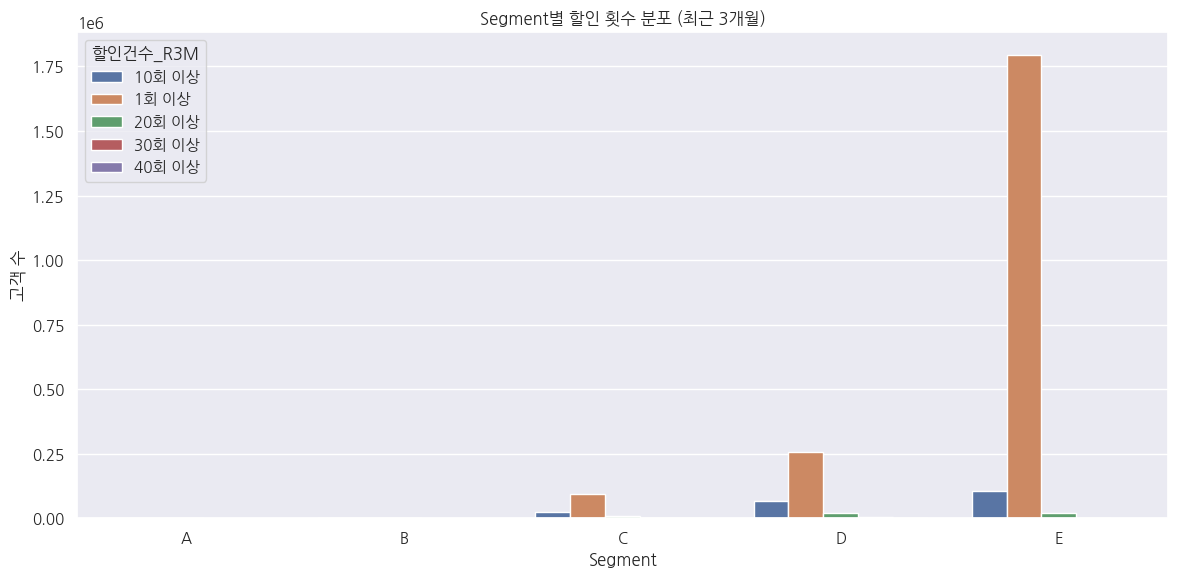

In [ ]:
# 그룹화 및 count (이미 구했던 코드)
discount_counts_R3M = chargeInfo.groupby(['Segment', '할인건수_R3M']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_counts_R3M, x='Segment', y='count', hue='할인건수_R3M')

plt.title('Segment별 할인 횟수 분포 (최근 3개월)')
plt.ylabel('고객 수')
plt.xlabel('Segment')
plt.legend(title='할인건수_R3M')
plt.tight_layout()
plt.show()

In [ ]:
chargeInfo['할인건수_B0M'].value_counts()

,count
할인건수_B0M,
1회 이상,2985956
10회 이상,14044


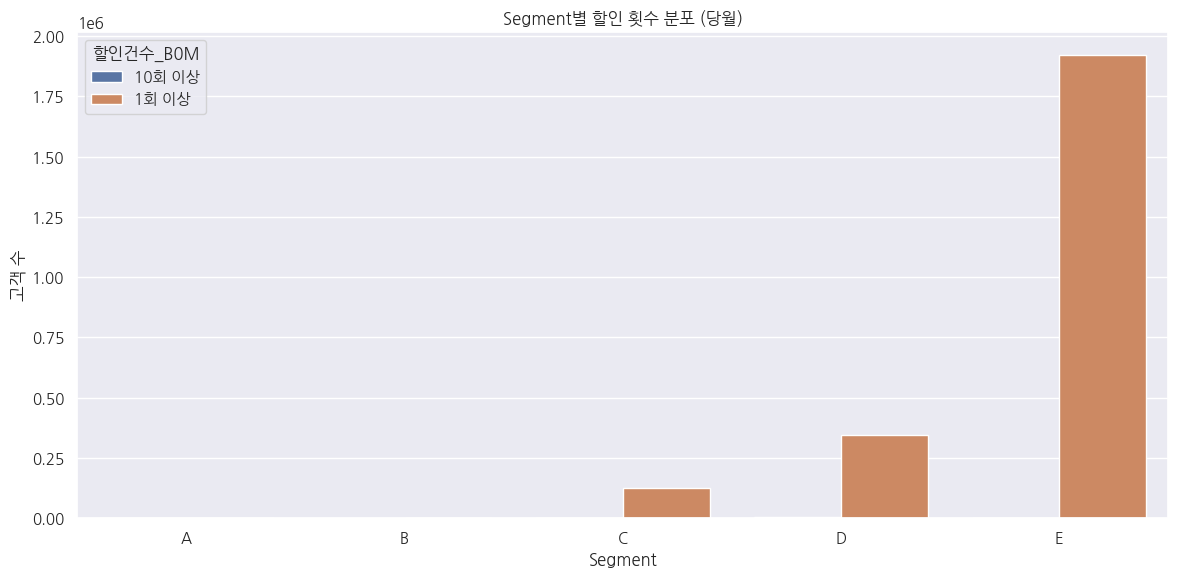

In [ ]:
# 그룹화 및 count (이미 구했던 코드)
discount_counts = chargeInfo.groupby(['Segment', '할인건수_B0M']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_counts, x='Segment', y='count', hue='할인건수_B0M')

plt.title('Segment별 할인 횟수 분포 (당월)')
plt.ylabel('고객 수')
plt.xlabel('Segment')
plt.legend(title='할인건수_B0M')
plt.tight_layout()
plt.show()

- E의 고객수가 가장 많으며, 소액 결제를 자주 이용하는 소비 성향일수도 있다.
- 할인은 제휴처, 이벤트 등 특정조건에서 무작위로 적용되는 경우가 많아 고객수가 많은 E그룹에서 발생할 확률이 높다.

### Segment별 할인금액 비교

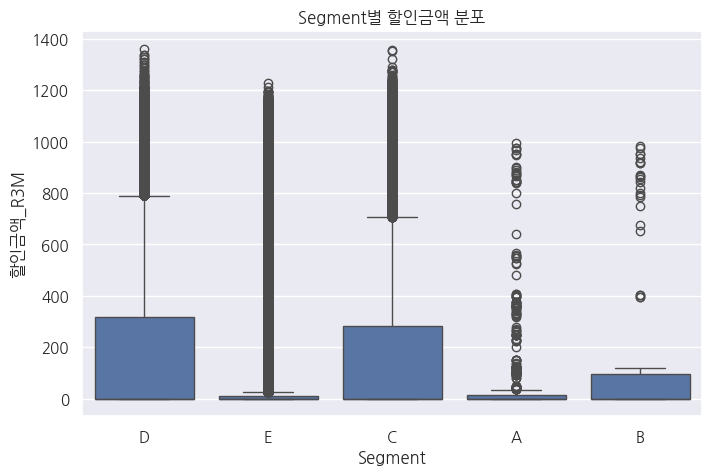

In [ ]:
# boxplot으로 할인금액 분포 보기
plt.figure(figsize=(8, 5))
sns.boxplot(data=chargeInfo, x='Segment', y='할인금액_R3M')
plt.title('Segment별 할인금액 분포')
plt.show()

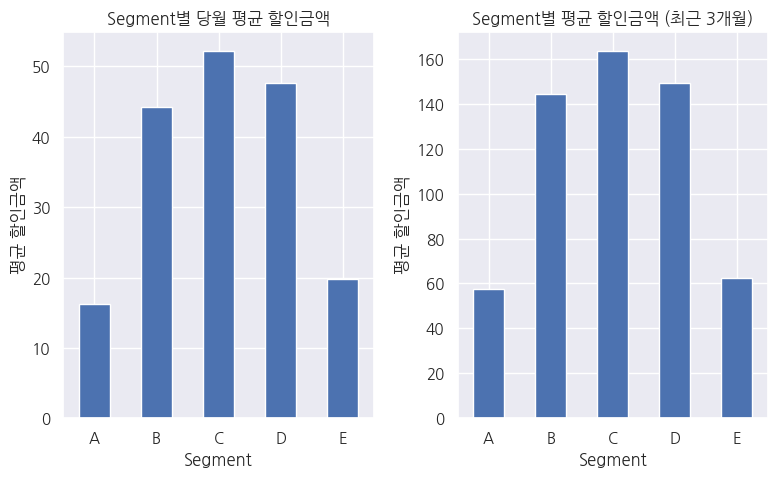

In [ ]:
# 세그먼트별 평균 할인 금액 시각화

plt.subplot(1, 2, 1)
chargeInfo.groupby('Segment')['할인금액_B0M'].mean().plot(kind='bar', figsize=(8, 5))

plt.title('Segment별 당월 평균 할인금액')
plt.ylabel('평균 할인금액')
plt.xticks(rotation=0)
plt.tight_layout()

plt.subplot(1, 2, 2)
chargeInfo.groupby('Segment')['할인금액_R3M'].mean().plot(kind='bar', figsize=(8, 5))

plt.title('Segment별 평균 할인금액 (최근 3개월)')
plt.ylabel('평균 할인금액')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- C, D 그룹은 할인 금액이 크고 분포가 넓다.
- B 그룹은 할인 금액 분포는 낮지만 평균이 높다.(적은 수의 고객에게 집중혜택)
- E 그룹은 고객수는 많지만 할인 금액은 낮다.(적은 금액의 할인혜택 가능성 있음)
- A는 할인금액, 분포 모두 낮으며, 할인에 민감하지 않은 고객층일 수 있다.

### 할인금액_청구서_R3M

In [ ]:
chargeInfo[['할인금액_청구서_R3M']].value_counts()

,count
할인금액_청구서_R3M,
0,1916115
27,73325
150,52951
149,24515
26,23777
...,...
1659,1
1662,1
1859,1


- 고객이 할인 받은 금액을 의미한다.
-

상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액

In [ ]:
chargeInfo['포인트_마일리지_환산_B0M'].value_counts()

,count
포인트_마일리지_환산_B0M,
0,2851625
78,1715
76,1637
77,1582
81,1573
...,...
517,1
506,1
513,1


In [6]:
# 제거할 컬럼 및 문자열 인코딩 처리
# 대표결제방법코드는 모두 '자동이체'로 동일 -> 삭제
# 대표청구서수령지구분코드, 대표청구지고객주소구분코드: 청구서수령방법에 대해 세분화한 것 -> 삭제
# 청구서발송여부_B0, 청구서발송여부_R3M, 청구서발송여부_R6M: 0,1로 구성, 청구금액이 0이면 미발송 -> 청구금액 변수와 겹치므로 삭제
chargeInfo = chargeInfo.drop(['대표결제방법코드', '대표청구서수령지구분코드', '대표청구지고객주소구분코드', '청구서발송여부_B0',
                                          '청구서발송여부_R3M', '청구서발송여부_R6M'], axis=1)

# 문자열 인코딩
chargeInfo['할인건수_R3M'] = chargeInfo['할인건수_R3M'].map({'1회 이상': 0, '10회 이상': 1, '20회 이상': 2,'30회 이상': 3, '40회 이상': 4})
chargeInfo['할인건수_B0M'] = chargeInfo['할인건수_B0M'].map({'1회 이상': 0, '10회 이상': 1})
chargeInfo

,기준년월,ID,대표결제일,청구서수령방법,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,문자메세지,12226,46588,88693,0,0,1444,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,우편,5834,10530,16861,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,이메일,21866,85931,165221,0,0,2305,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,우편,16356,61518,127371,0,0,1452,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,우편,0,0,155,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,20,우편,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999996,201812,TEST_99996,20,우편,359,1256,2237,0,0,0,...,5,3,3,2,0,0,149,0,49,NaN
2999997,201812,TEST_99997,15,이메일,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999998,201812,TEST_99998,12,K톡,21273,48141,108420,0,0,0,...,1,1,7,3,0,0,0,0,0,NaN


In [7]:
categorical_cols = [
    '기준년월', 'ID', '대표결제일','청구서수령방법'
]

numerical_cols = [
    '청구금액_B0', '청구금액_R3M', '청구금액_R6M',
    '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M',
    '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M',
    '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M',
    '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M',
    '포인트_적립포인트_R12M', '포인트_적립포인트_R3M',
    '포인트_이용포인트_R12M', '포인트_이용포인트_R3M',
    '포인트_잔여포인트_B0M',
    '마일_적립포인트_R12M', '마일_적립포인트_R3M',
    '마일_이용포인트_R12M', '마일_이용포인트_R3M',
    '마일_잔여포인트_B0M',
    '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M',
    '할인금액_청구서_R3M', '할인금액_청구서_B0M',
    '상환개월수_결제일_R6M', '상환개월수_결제일_R3M',
    '선결제건수_R6M', '선결제건수_R3M',
    '연체건수_R6M', '연체건수_R3M',
    '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액'
]


In [8]:
from scipy.stats import chi2_contingency

# 범주형 변수 간의 연관 정도 확인 (Cramer's V : 크래머의 V)
# 두 범주형 변수 간의 연관정도를 수치로 나타냄

# 함수 1: Cramér's V (범주형)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * k)) if k > 0 else np.nan

# 수치형 독립 변수와 범주형 타겟 변수 사이의 관련성 확인 (Eta Squared : 에타 제곱)

# 함수 2: Eta Squared (수치형)
def eta_squared(y, x):
    groups = [x[y == val] for val in y.unique()]
    grand_mean = x.mean()
    sst = ((x - grand_mean)**2).sum()
    ssb = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups)
    return ssb / sst if sst != 0 else np.nan




# Cramér's V 계산 시 Segment에서 E, D, C만 사용
df_train_only = chargeInfo[chargeInfo['Segment'].notna()]
df_major = df_train_only[df_train_only['Segment'].isin(['C', 'D', 'E'])]


# 관련성 결과 저장
cramer_results = []
eta_results = []

# Cramér's V 계산
for col in categorical_cols:
    if col in df_major.columns:
        try:
            val = cramers_v(df_major[col], df_major['Segment'])
            cramer_results.append((col, val))
        except:
            cramer_results.append((col, np.nan))

# Eta Squared 계산
for col in numerical_cols:
    if col in df_major.columns:
        try:
            val = eta_squared(df_major['Segment'], df_major[col])
            eta_results.append((col, val))
        except:
            eta_results.append((col, np.nan))

# 결과 정리
cramer_df = pd.DataFrame(cramer_results, columns=['column', 'cramers_v'])
eta_df = pd.DataFrame(eta_results, columns=['column', 'eta_squared'])

# 기준 이하 컬럼 추출
low_cramer = cramer_df[cramer_df['cramers_v'] < 0.1]
low_eta = eta_df[eta_df['eta_squared'] < 0.01]

display(low_cramer)
display(low_eta)
# cramers_v(chargeInfo['기준년월'], df_major['Segment'])



,column,cramers_v
0,기준년월,0.000000
2,대표결제일,0.038342
3,청구서수령방법,0.069113


,column,eta_squared
15,포인트_잔여포인트_B0M,0.000006
23,할인건수_B0M,0.009045
31,연체건수_R6M,0.004310
32,연체건수_R3M,0.003540


In [9]:
# 관련성 낮은 컬럼 이름 리스트화
low_cramer_cols = low_cramer['column'].dropna().tolist()
low_eta_cols = low_eta['column'].dropna().tolist()

# 통합 제거 리스트 (중복 제거)
drop_cols = list(set(low_cramer_cols + low_eta_cols))

print("제거할 컬럼 수:", len(drop_cols))
print("제거할 컬럼명:", drop_cols)

# 원본에서 제거
chargeInfo_reduced = chargeInfo.drop(columns=low_eta_cols, errors='ignore')
chargeInfo_reduced = chargeInfo.drop(columns=['대표결제일'], errors='ignore')


제거할 컬럼 수: 7
제거할 컬럼명: ['연체건수_R6M', '기준년월', '할인건수_B0M', '포인트_잔여포인트_B0M', '대표결제일', '청구서수령방법', '연체건수_R3M']


In [10]:
chargeInfo_reduced

,기준년월,ID,청구서수령방법,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,포인트_포인트_건별_R3M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,문자메세지,12226,46588,88693,0,0,1444,1827,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,우편,5834,10530,16861,0,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,이메일,21866,85931,165221,0,0,2305,5153,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,우편,16356,61518,127371,0,0,1452,2523,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,우편,0,0,155,0,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,우편,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999996,201812,TEST_99996,우편,359,1256,2237,0,0,0,0,...,5,3,3,2,0,0,149,0,49,NaN
2999997,201812,TEST_99997,이메일,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999998,201812,TEST_99998,K톡,21273,48141,108420,0,0,0,0,...,1,1,7,3,0,0,0,0,0,NaN


In [ ]:
10/0

ZeroDivisionError: division by zero

In [11]:
chargeInfo_train = chargeInfo_reduced.query('Segment.notna()')
chargeInfo_train.reset_index(inplace=True, drop=True)

chargeInfo_test = chargeInfo_reduced.query('Segment.isna()')
chargeInfo_test.drop('Segment', axis=1, inplace=True)
chargeInfo_test.reset_index(inplace=True, drop=True)


chargeInfo_train.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_train.csv', index=False, encoding='utf-8-sig')
chargeInfo_test.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_test.csv', index=False, encoding='utf-8-sig')

In [12]:
train_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_train.csv')
test_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_test.csv')

display(train_temp)
display(test_temp)

,기준년월,ID,청구서수령방법,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,포인트_포인트_건별_R3M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,문자메세지,12226,46588,88693,0,0,1444,1827,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,우편,5834,10530,16861,0,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,이메일,21866,85931,165221,0,0,2305,5153,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,우편,16356,61518,127371,0,0,1452,2523,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,우편,0,0,155,0,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,우편,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,이메일,14402,37515,99849,0,0,3339,10890,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,TRAIN_399997,우편,5731,22274,41073,0,0,0,0,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,우편,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


,기준년월,ID,청구서수령방법,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,포인트_포인트_건별_R3M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
0,201807,TEST_00000,이메일,4931,11441,22151,1017,2532,0,0,...,0,5,2,0,0,0,0,143,148,56
1,201807,TEST_00001,문자메세지,10152,20522,32878,0,0,0,0,...,14,6,3,0,0,0,0,0,0,0
2,201807,TEST_00002,이메일,13223,50508,71867,0,0,0,0,...,50,6,3,0,0,0,0,148,0,50
3,201807,TEST_00003,우편,2112,4604,4986,0,0,922,1319,...,0,2,1,0,0,4,2,3,0,1
4,201807,TEST_00004,우편,4406,6788,10758,0,0,0,0,...,0,6,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,우편,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599996,201812,TEST_99996,우편,359,1256,2237,0,0,0,0,...,50,5,3,3,2,0,0,149,0,49
599997,201812,TEST_99997,이메일,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599998,201812,TEST_99998,K톡,21273,48141,108420,0,0,0,0,...,242,1,1,7,3,0,0,0,0,0
